<a href="https://colab.research.google.com/github/ioanap20/Branch-and-bound-for-TSP/blob/main/medical_outcomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this project, we aim to predict the severity of lung cancer patients(the level) using machine learning techniques. We begin by analyzing a cancer patient dataset *(cancer patients data sets.csv4)* and apply four models:

**Logistic Regression**

**Random Forest Classifier**

**KNN neighbors**

**Gaussian Naive Bayes**

Our goal is to evaluate how accurately these models can estimate the severity based on available patient features.

After building and testing our models on this dataset, we will repeat the process with another cancer-related dataset *(global_cancer_patients_2015_2024.csv)* . This will allow us to compare the performance and generalizability of both models across different data sources, helping us determine which method is more effective for predicting survival outcomes.

#Data visualization


In [ ]:

# Import standard libraries for  machine learning
import pandas as pd                  # For data manipulation
import numpy as np                   # For numerical operations
import matplotlib.pyplot as plt      # For plotting
import seaborn as sns                # For visualizations
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Import the model we'll use
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

# Upload CSV file from the computer
from google.colab import files
uploaded = files.upload()
import io
from IPython.display import display, HTML

# Load the dataset into a pandas DataFrame
df1 = pd.read_excel('cancer patient data sets.xlsx')

#  Display the first few rows of the dataset
df1.head()


Saving cancer patient data sets.xlsx to cancer patient data sets (1).xlsx


Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0         P1   33       1              2            4             5   
1        P10   17       1              3            1             5   
2       P100   35       1              4            5             6   
3      P1000   37       1              7            7             7   
4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...        3            4                    2         2   
1  ...        1            3                    7         8   
2  ...        8            7                    9         2   
3  ...        4            2                    3         1   
4  ...        3            2                    4         1   

   Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  Dry Cough  \
0                      3                         1              2          3   
1                      6                         2              1          7   
2                      1                         4              6          7   
3                      4                         5              6          7   
4                      4                         2              4          2   

   Snoring   Level  
0        4     Low  
1        2  Medium  
2        2    High  
3        5    High  
4        3    High  

[5 rows x 25 columns]

In [ ]:
uploaded = files.upload()
df2 = pd.read_csv('global_cancer_patients_2015_2024.csv')
df2.head()


Saving global_cancer_patients_2015_2024.csv to global_cancer_patients_2015_2024 (1).csv


Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  Air_Pollution  \
0  PT0000000   71    Male             UK  2021           6.4            2.8   
1  PT0000001   34    Male          China  2021           1.3            4.5   
2  PT0000002   80    Male       Pakistan  2023           7.4            7.9   
3  PT0000003   40    Male             UK  2015           1.7            2.9   
4  PT0000004   43  Female         Brazil  2017           5.1            2.8   

   Alcohol_Use  Smoking  Obesity_Level Cancer_Type Cancer_Stage  \
0          9.5      0.9            8.7        Lung    Stage III   
1          3.7      3.9            6.3    Leukemia      Stage 0   
2          2.4      4.7            0.1      Breast     Stage II   
3          4.8      3.5            2.7       Colon      Stage I   
4          2.3      6.7            0.5        Skin    Stage III   

   Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
0            62913.44             5.9                   4.92  
1            12573.41             4.7                   4.65  
2             6984.33             7.1                   5.84  
3            67446.25             1.6                   3.12  
4            77977.12             2.9                   3.62

In [ ]:
#Display the last 5 rows to check how the dataset ends
display(HTML(f"""
    <div style="display: flex; justify-content: space-between;">
        <div style="margin-right: 10px;">{df1.tail().to_html()}</div>
        <div>{df2.tail().to_html()}</div>
    </div>
"""))

In [ ]:
#Display the last 5 rows to check how the dataset ends # Get a concise summary of the dataset: column names, non-null counts, and data types
# Capture info output for df1
buffer1 = io.StringIO()
df1.info(buf=buffer1)
info1 = buffer1.getvalue()

# Capture info output for df2
buffer2 = io.StringIO()
df2.info(buf=buffer2)
info2 = buffer2.getvalue()

# Display side-by-side
display(HTML(f"""
<div style="display: flex; gap: 40px;">
  <pre>{info1}</pre>
  <pre>{info2}</pre>
</div>
"""))

We see that PatientID is not a numerical value, and it doesn't influence the level of cancer, so then we can ignore it.

In [ ]:
df1 = df1.drop(columns=["Patient Id"])
df2 = df2.drop(columns=["Patient_ID"])

In [ ]:
# Generate summary statistics for all numeric columns (count, mean, std, min, max, quartiles)
desc1 = df1.describe().to_html()
desc2 = df2.describe().to_html()

display(HTML(f"""
<div style="display: flex; gap: 40px;">
  <div>{desc1}</div>
  <div>{desc2}</div>
</div>
"""))

In [ ]:
# Check for missing values in each column
missing1 = df1.isnull().sum().to_frame(name='Missing Values')
missing2 = df2.isnull().sum().to_frame(name='Missing Values')

display(HTML(f"""
<div style="display: flex; gap: 40px;">
  <div>{missing1.to_html()}</div>
  <div>{missing2.to_html()}</div>
</div>
"""))

In [ ]:
print(int(df1.duplicated().sum())) # Count the number of duplicate rows in the dataset (converted to a regular integer)
print(int(df2.duplicated().sum()))

848
0


In [ ]:
# Show the number of rows and columns in the dataset as a tuple (rows, columns)
shape1 = f"<strong>df1.shape:</strong> {df1.shape}"
shape2 = f"<strong>df2.shape:</strong> {df2.shape}"

display(HTML(f"""
<div style="display: flex; gap: 40px;">
  <div>{shape1}</div>
  <div>{shape2}</div>
</div>
"""))

In [ ]:
# Display the data type of each column (e.g., int, float, object)
dtypes1 = df1.dtypes.to_frame(name='df1 dtypes').to_html()
dtypes2 = df2.dtypes.to_frame(name='df2 dtypes').to_html()

display(HTML(f"""
<div style="display: flex; gap: 40px;">
  <div>{dtypes1}</div>
  <div>{dtypes2}</div>
</div>
"""))

In [ ]:
# List all column names in the dataset
columns1 = pd.DataFrame(df1.columns, columns=['df1 Columns']).to_html(index=False)
columns2 = pd.DataFrame(df2.columns, columns=['df2 Columns']).to_html(index=False)

display(HTML(f"""
<div style="display: flex; gap: 40px;">
  <div>{columns1}</div>
  <div>{columns2}</div>
</div>
"""))

In [ ]:
# Print all column names with their corresponding index numbers
df1_cols = pd.DataFrame({
    "Index": range(1, len(df1.columns)+1),
    "df1 Columns": df1.columns
}).to_html(index=False)

df2_cols = pd.DataFrame({
    "Index": range(1, len(df2.columns)+1),
    "df2 Columns": df2.columns
}).to_html(index=False)

# Display them side by side in notebook
display(HTML(f"""
<div style="display: flex; gap: 40px;">
  <div>{df1_cols}</div>
  <div>{df2_cols}</div>
</div>
"""))

In [ ]:
# Find the maximum age in the dataset
max_age1 = df1['Age'].max()
max_age2 = df2['Age'].max()
# Filter the dataset to find the patient(s) with the maximum age
oldest_patients = df1[df1['Age'] == max_age1]
oldest_patients2 = df2[df2['Age'] == max_age2]
# Display the details of the oldest patient(s)
print(oldest_patients, "First dataset")
print(oldest_patients2, "Second dataset")

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
15    73       1              5            6             6   
126   73       1              5            6             6   
237   73       1              5            6             6   
348   73       1              5            6             6   
459   73       1              5            6             6   
570   73       1              5            6             6   
681   73       1              5            6             6   
792   73       1              5            6             6   
889   73       1              5            6             6   
903   73       1              5            6             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
15                      5             6                     5              6   
126                     5             6                     5              6   
237                     5             6                     5              6 

In [ ]:
# Find the minimum age in the dataset
min_age1 = df1['Age'].min()
min_age2 = df2['Age'].min()

# Filter the dataset to find the patient(s) with the minimum age
youngest_patients1 = df1[df1['Age'] == min_age1]
youngest_patients2 = df2[df2['Age'] == min_age2]

# Display the details of the youngest patient(s)
print(youngest_patients1, "First dataset")
print(youngest_patients2, "Second dataset")

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
19    14       1              2            4             5   
35    14       1              2            4             5   
130   14       1              2            4             5   
241   14       1              2            4             5   
352   14       1              2            4             5   
574   14       1              2            4             5   
685   14       1              2            4             5   
796   14       1              2            4             5   
907   14       1              2            4             5   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
19                      6             5                     5              4   
35                      6             5                     5              4   
130                     6             5                     5              4   
241                     6             5                    

# Data Analysis + Finding correlations

In [ ]:
# Create a table showing the number of patients who have a genetic risk and how it corresponds to the level of cancer
GeneticRisk_cancer_counts1 = df1.groupby(['Genetic Risk', 'Level']).size().unstack(fill_value=0)
GeneticRisk_cancer_counts2 = df2.groupby(['Genetic_Risk', 'Target_Severity_Score']).size().unstack(fill_value=0)
# Display the first few rows of the resulting table
display(HTML(f"""
    <div style="display: flex; justify-content: space-between;">
        <div style="margin-right: 10px;">{GeneticRisk_cancer_counts1.head().to_html()}</div>
        <div>{GeneticRisk_cancer_counts2.head().to_html()}</div>
    </div>
"""))

In [ ]:
# Show summary statistics of severity scores for each smoking level
Smoking_Cancer_Counts1 = df1.groupby('Smoking')['Level'].describe()
Smoking_Cancer_Counts2 = df2.groupby('Smoking')['Target_Severity_Score'].describe()

display(HTML(f"""
    <div style="display: flex; justify-content: space-between;">
        <div style="margin-right: 10px;">{Smoking_Cancer_Counts1.head().to_html()}</div>
        <div>{Smoking_Cancer_Counts2.head().to_html()}</div>
    </div>
"""))

Now we want to understand the data better, we want to find relationships between features. We will do different scatterplots to find these. We want our visualizations to answer relevant questions like "what factors impact the level?", or "how does risk relate to severity?"

Let us check if the target value is balanced. If we need undersampling or oversampling.

In [ ]:
print(df1["Level"].value_counts(), "First Dataset")
print(df2["Target_Severity_Score"].value_counts(), "Second Dataset")

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64 First Dataset
Target_Severity_Score
4.99    188
4.79    185
5.12    180
5.28    180
4.81    178
       ... 
1.38      1
8.66      1
0.94      1
8.65      1
1.18      1
Name: count, Length: 744, dtype: int64 Second Dataset


This is close enough to uniform that we do not need oversampling or undersampling

**Age distribution**

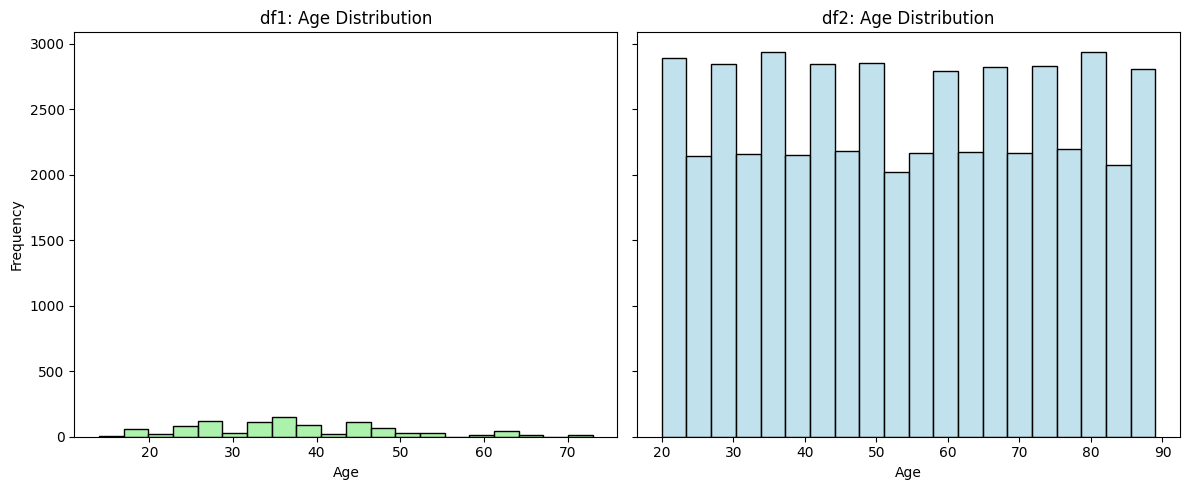

In [ ]:
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot df1
sns.histplot(df1['Age'], bins=20, color="lightgreen", ax=axes[0])
axes[0].set_title("df1: Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

# Plot df2
sns.histplot(df2['Age'], bins=20, color="lightblue", ax=axes[1])
axes[1].set_title("df2: Age Distribution")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

Because the difference between the size of the datasets is so significant, we should start filtering the second dataset to show only the lung cancer.

In [ ]:
df2 = df2[df2['Cancer_Type'] == 'Lung']

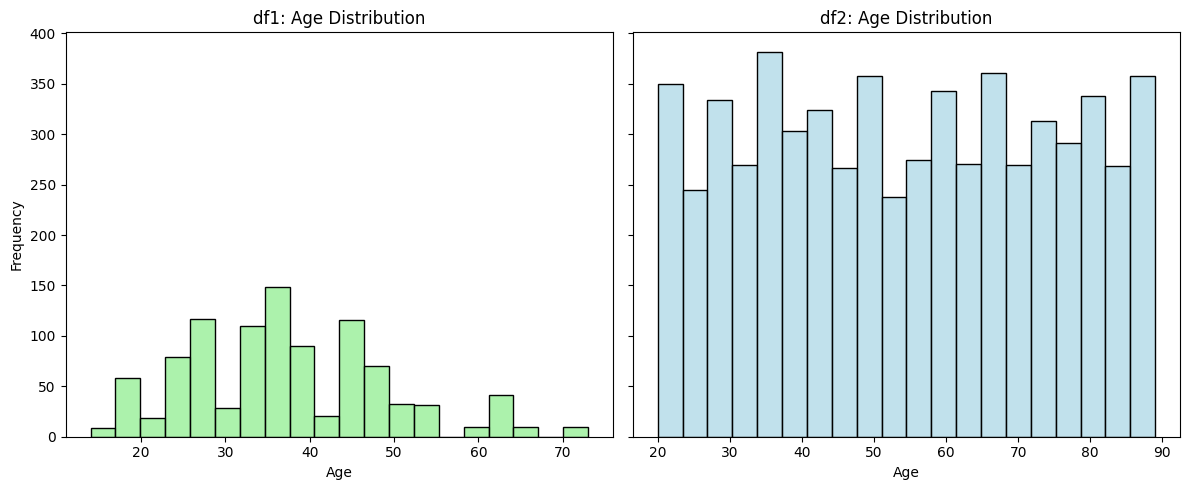

In [ ]:
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot df1
sns.histplot(df1['Age'], bins=20, color="lightgreen", ax=axes[0])
axes[0].set_title("df1: Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

# Plot df2
sns.histplot(df2['Age'], bins=20, color="lightblue", ax=axes[1])
axes[1].set_title("df2: Age Distribution")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

We see that there is no single age range with a dramatically higher frequency, implying the model or study is not skewed toward younger or older patients.

**Gender Distribution**

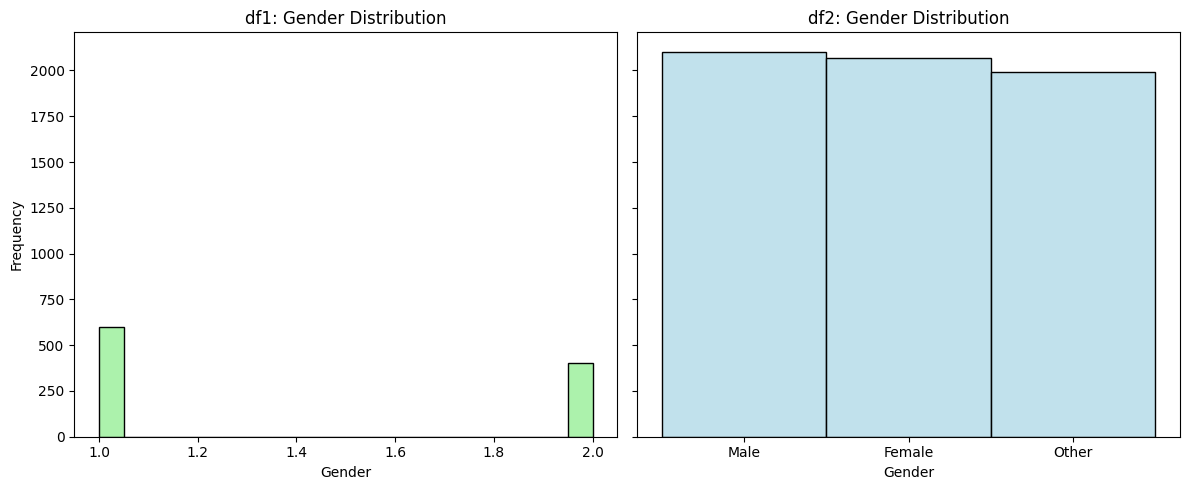

In [ ]:
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot df1
sns.histplot(df1['Gender'], bins=20, color="lightgreen", ax=axes[0])
axes[0].set_title("df1: Gender Distribution")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Frequency")

# Plot df2
sns.histplot(df2['Gender'], bins=20, color="lightblue", ax=axes[1])
axes[1].set_title("df2: Gender Distribution")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

This gender distribution bar chart shows that the number of cancer patients in the dataset is nearly equal across all three gender categories: Male, Female, and Other.

**Cancer Types**

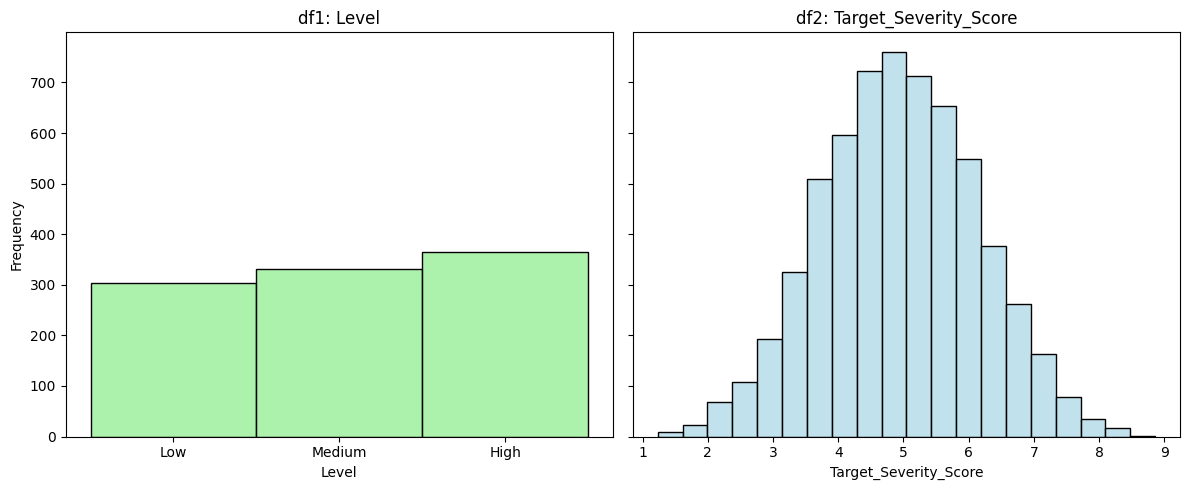

In [ ]:
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot df1
sns.histplot(df1['Level'], bins=20, color="lightgreen", ax=axes[0])
axes[0].set_title("df1: Level")
axes[0].set_xlabel("Level")
axes[0].set_ylabel("Frequency")

# Plot df2
sns.histplot(df2['Target_Severity_Score'], bins=20, color="lightblue", ax=axes[1])
axes[1].set_title("df2: Target_Severity_Score")
axes[1].set_xlabel("Target_Severity_Score")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

We see that the most cancer of high intensity is the most frequent for the first dataset, while the second dataset has a normal distribution, with a mean around 5 - which equates to around "medium" in the terms of the first dataset.

**Distribution of some of the Risk Factors**

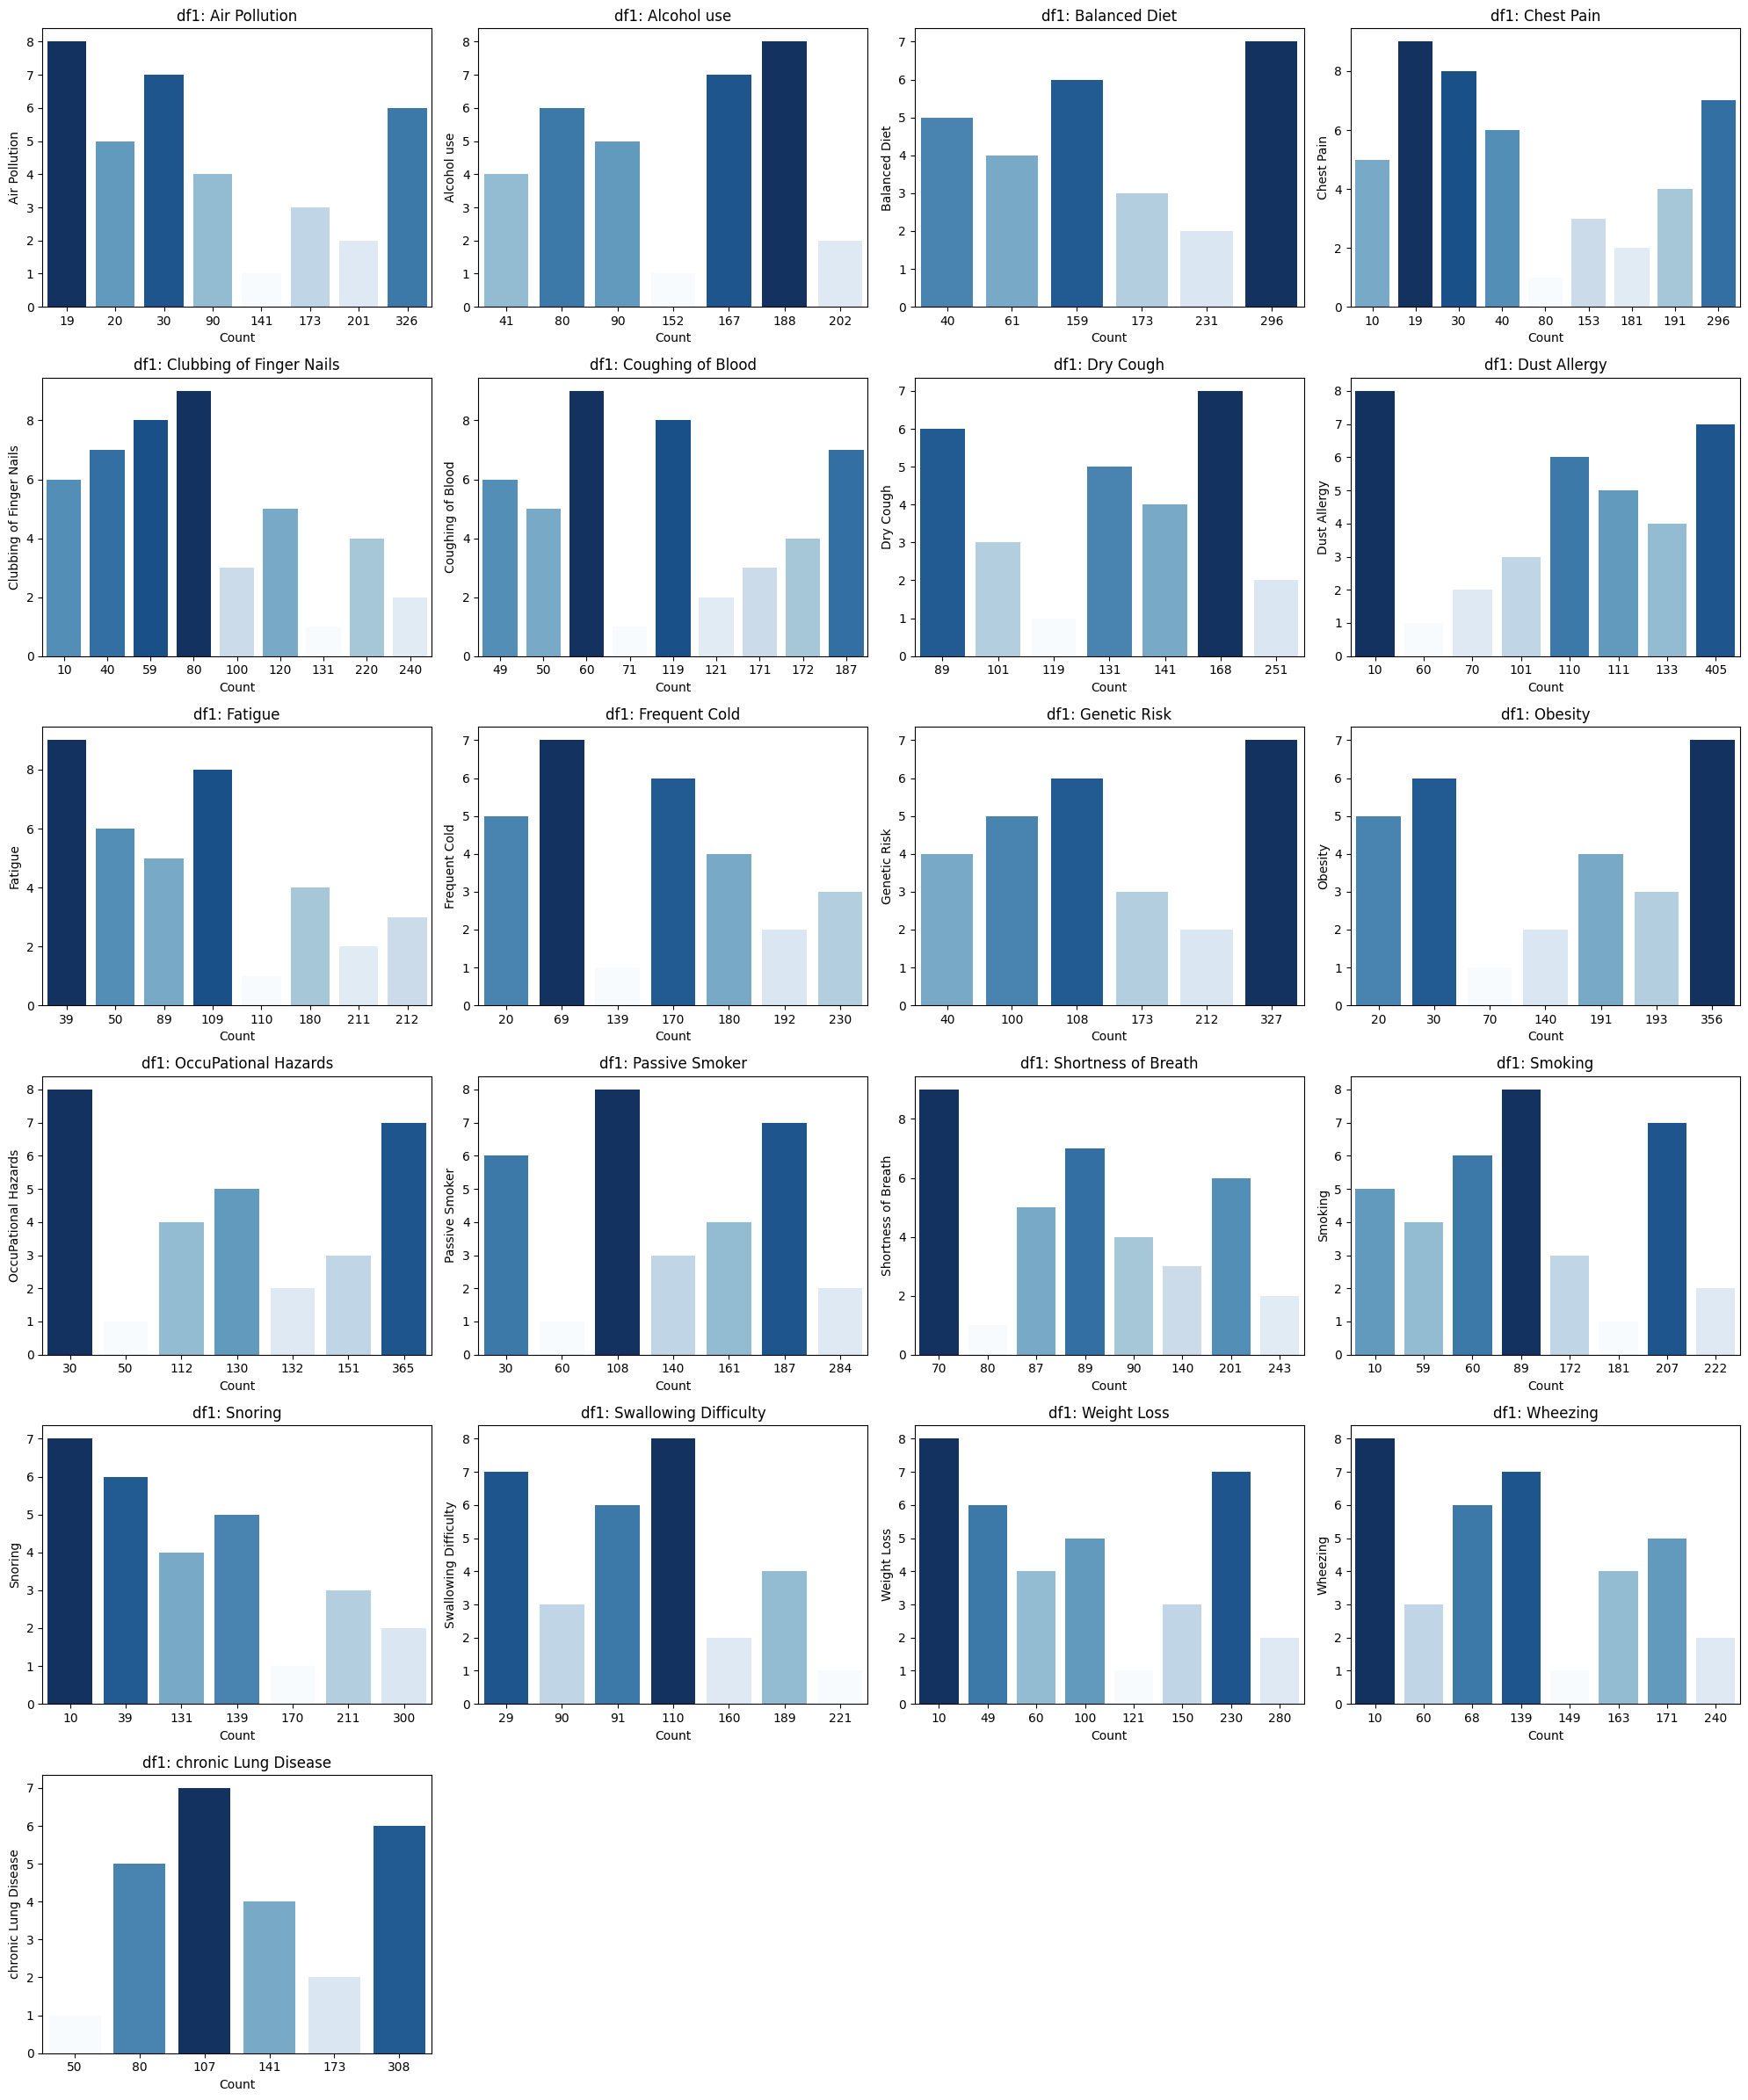

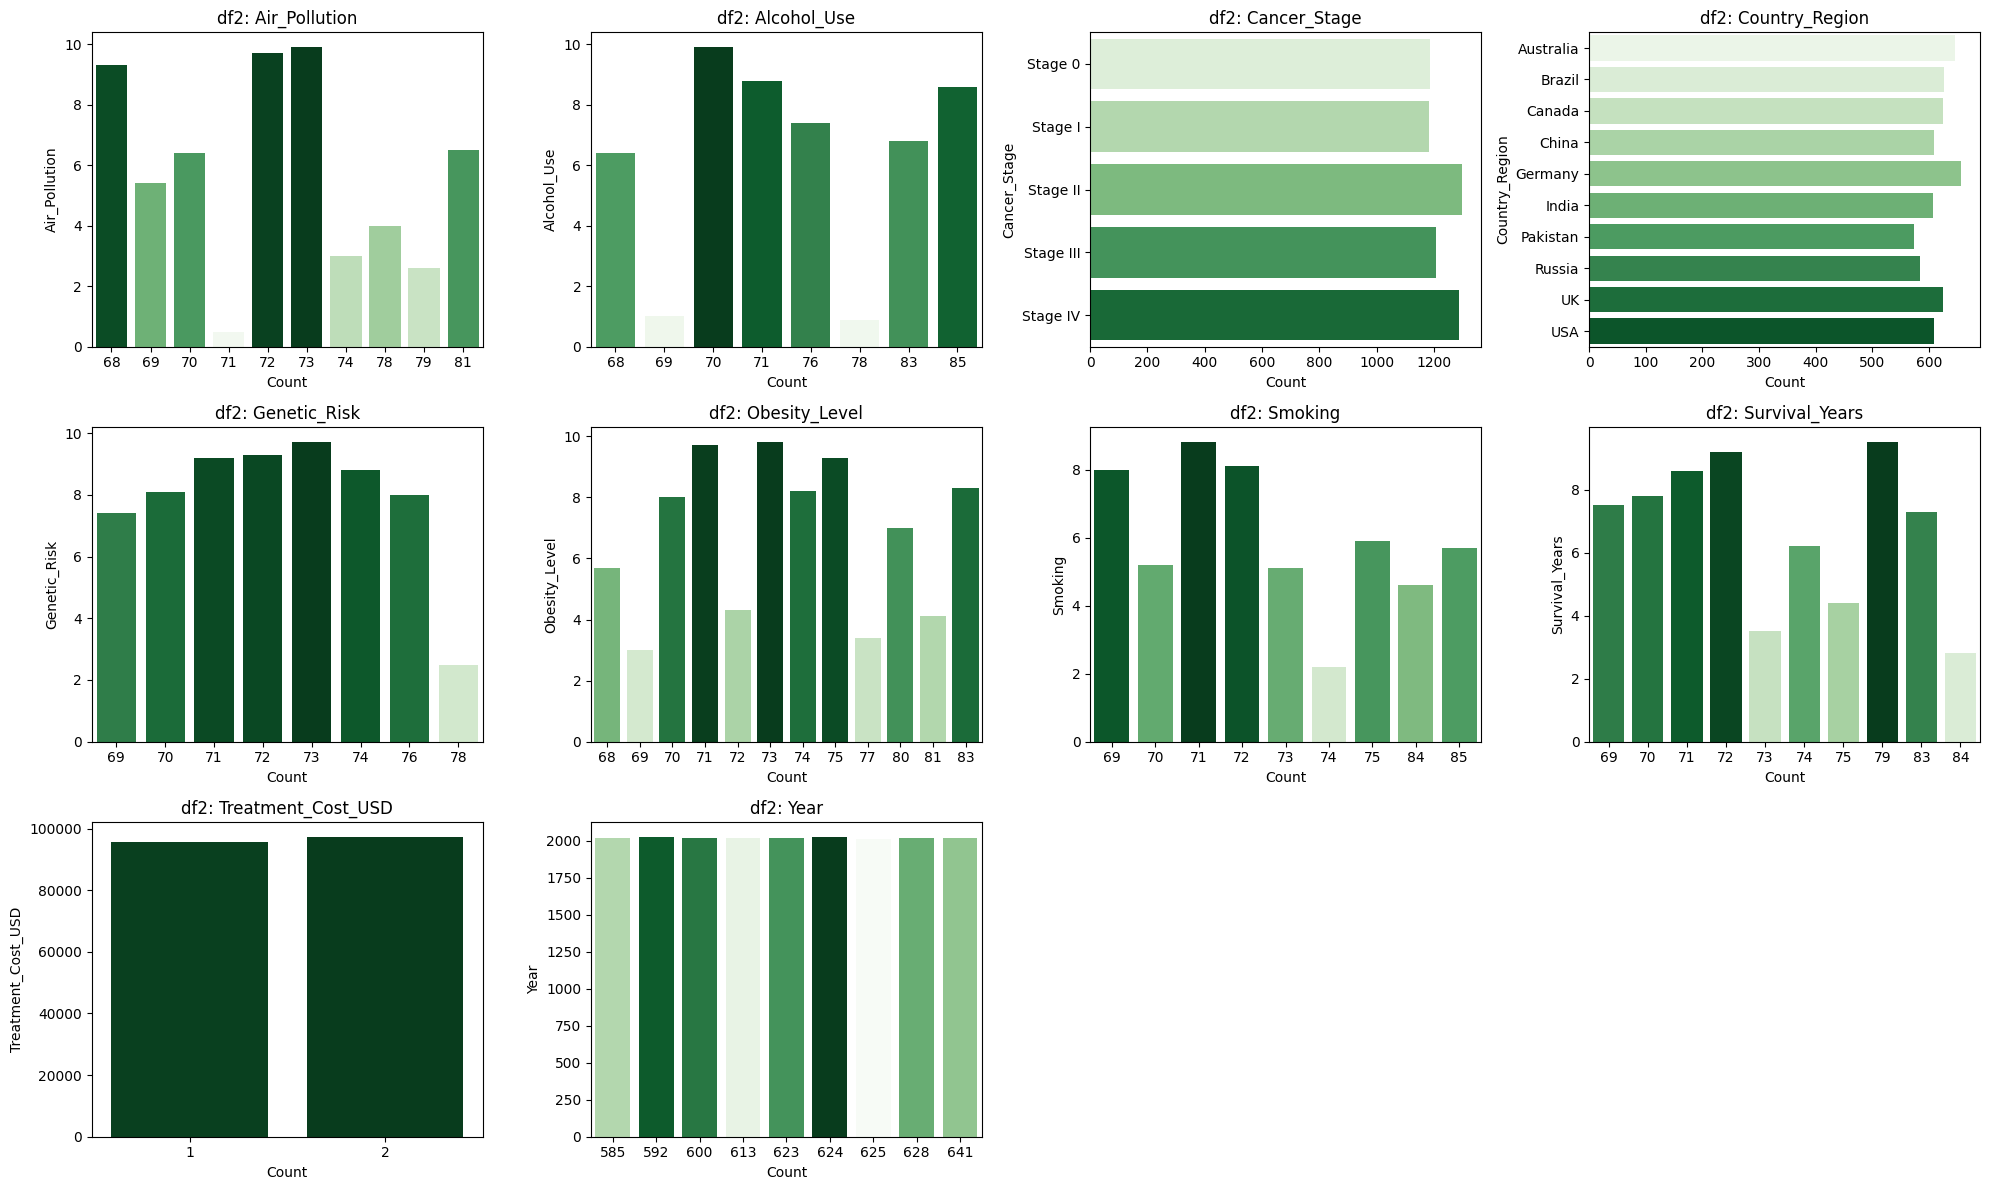

In [ ]:
# Define features to plot
columns_to_plot1 = df1.columns.difference(['Level', 'Age', 'Gender'])
columns_to_plot2 = df2.columns.difference(['Target_Severity_Score', 'Age', 'Gender', 'Cancer_Type'])

def plot_dataset_bars(df, columns_to_plot, dataset_name, color_palette):
    n_cols = 4
    n_features = len(columns_to_plot)
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(columns_to_plot):
        counts = df[col].value_counts().nlargest(20).sort_index()
        plot_df = pd.DataFrame({'Category': counts.index, 'Count': counts.values, 'Hue': counts.index})

        sns.barplot(data=plot_df, ax=axes[i], x='Count', y='Category', hue='Hue', palette=color_palette, dodge=False)
        axes[i].set_title(f'{dataset_name}: {col}')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(col)
        legend = axes[i].get_legend()
        if legend:
          legend.remove()


    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Plot all features from df1
plot_dataset_bars(df1, sorted(columns_to_plot1), "df1", "Blues")

# Plot all features from df2
plot_dataset_bars(df2, sorted(columns_to_plot2), "df2", "Greens")


Let us check if we have redundant values

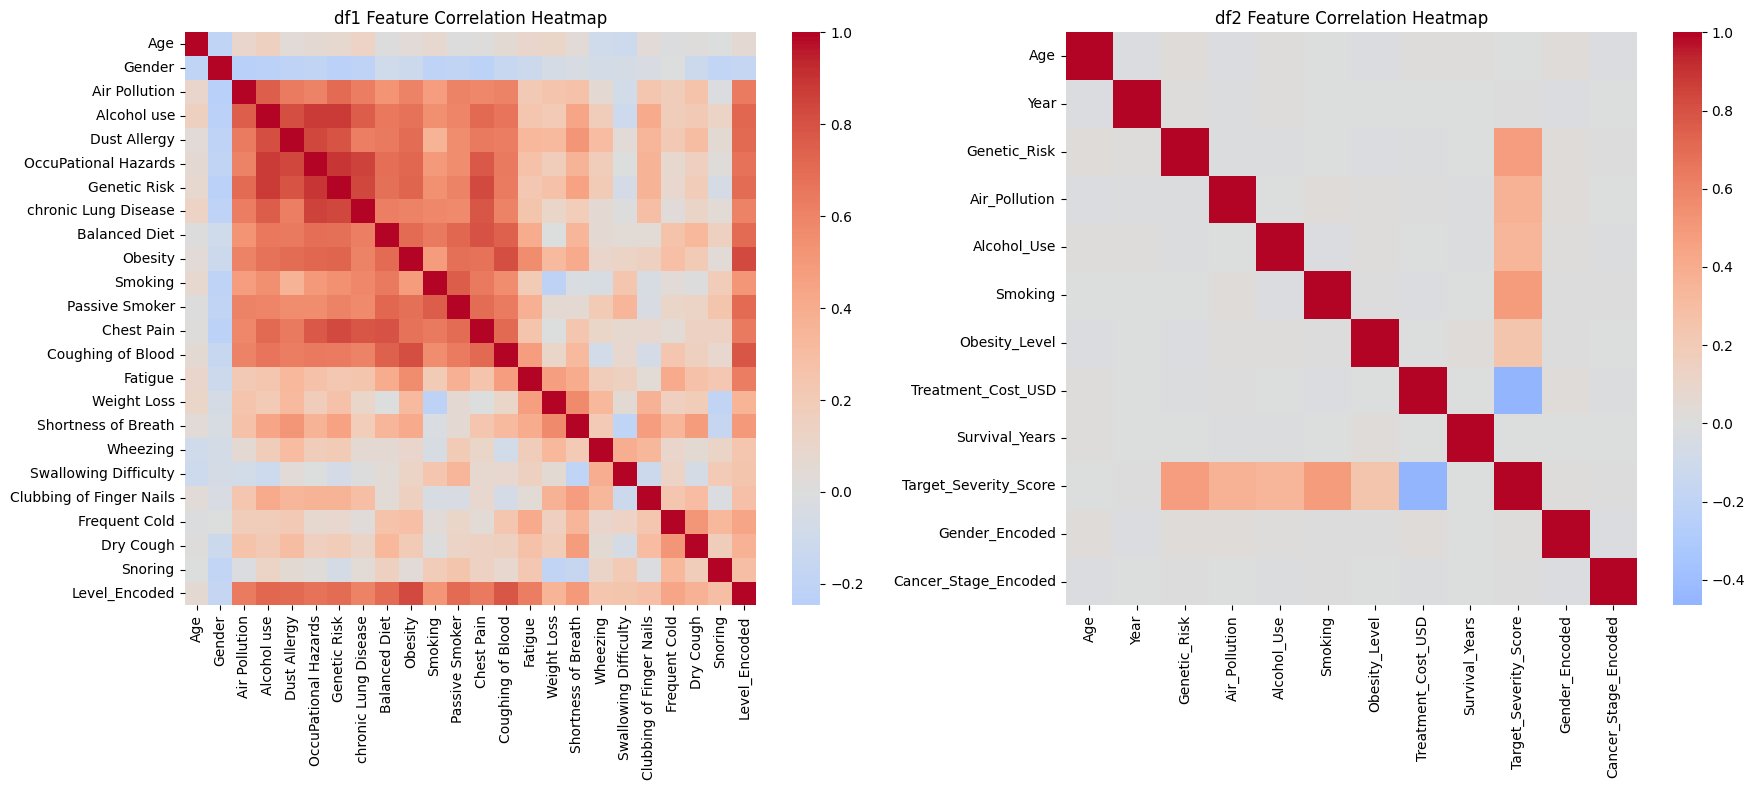

In [ ]:
# Compute correlation matrices (numeric columns only)
gender_map =  {'Male': 0, 'Female': 1, 'Other': 2}
df2['Gender_Encoded'] = df2['Gender'].map(gender_map)
stage_map = {
    'Stage I': 1,
    'Stage II': 2,
    'Stage III': 3,
    'Stage IV': 4
}
df2['Cancer_Stage_Encoded'] = df2['Cancer_Stage'].map(stage_map)

level_map = {'Low': 1, 'Medium': 2, 'High': 3}
df1['Level_Encoded'] = df1['Level'].map(level_map)

corr_df1 = df1.corr(numeric_only=True)
corr_df2 = df2.corr(numeric_only=True)

# Set up side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Heatmap for df1
sns.heatmap(corr_df1, ax=axes[0], annot=False, cmap='coolwarm', center=0)
axes[0].set_title("df1 Feature Correlation Heatmap")

# Heatmap for df2
sns.heatmap(corr_df2, ax=axes[1], annot=False, cmap='coolwarm', center=0)
axes[1].set_title("df2 Feature Correlation Heatmap")

plt.tight_layout()
plt.show()


**First Data Base**

We see that 'Smoking' and 'Passive Smoker' are highly correlated, then we could loose one of them such that our database is not redundant. We see that the same happends for 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing'. From 'Air Pollution', 'Dust Allergy', and 'Occupational Hazards' we should keep only the most relevant one. Then we need to consider some type of feature selection.

**Second data base**

We see from the correlation map that the factors are none correlated with eachother. This is very different from the first database. Here we see the difference in formation and characteristics. That means that this database is much more suited for **Logistic Regression** and **KNN**.

In [ ]:
X1 = df1.drop(columns = ['Level', 'Level_Encoded'], axis=1)
y1 = df1['Level_Encoded']

print(df2.columns)

X2 = df2.drop(columns = ['Target_Severity_Score', 'Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage'], axis=1)
y2 = df2['Target_Severity_Score']

model1 = RandomForestClassifier(random_state=0)
model2 = RandomForestRegressor()


model1.fit(X1, y1)
model2.fit(X2, y2)

importances1 = pd.Series(model1.feature_importances_, index=X1.columns)
importances2 = pd.Series(model2.feature_importances_, index=X2.columns)

selected_features1 = importances1[importances1 > 0.05].sort_values(ascending=False)
selected_features2 = importances2[importances2 > 0.05].sort_values(ascending=False)
print("Database 1")
print(selected_features1)
print('\n'"Database 2")
print(selected_features2)

Index(['Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score', 'Gender_Encoded', 'Cancer_Stage_Encoded'],
      dtype='object')
Database 1
Coughing of Blood    0.111357
Obesity              0.101123
Passive Smoker       0.088028
Wheezing             0.070337
Fatigue              0.055691
Alcohol use          0.051457
Genetic Risk         0.050984
dtype: float64

Database 2
Smoking               0.236904
Genetic_Risk          0.235090
Treatment_Cost_USD    0.208072
Air_Pollution         0.127837
Alcohol_Use           0.121079
Obesity_Level         0.050976
dtype: float64


**Correlation Heatmap risk factors(numerical features)**

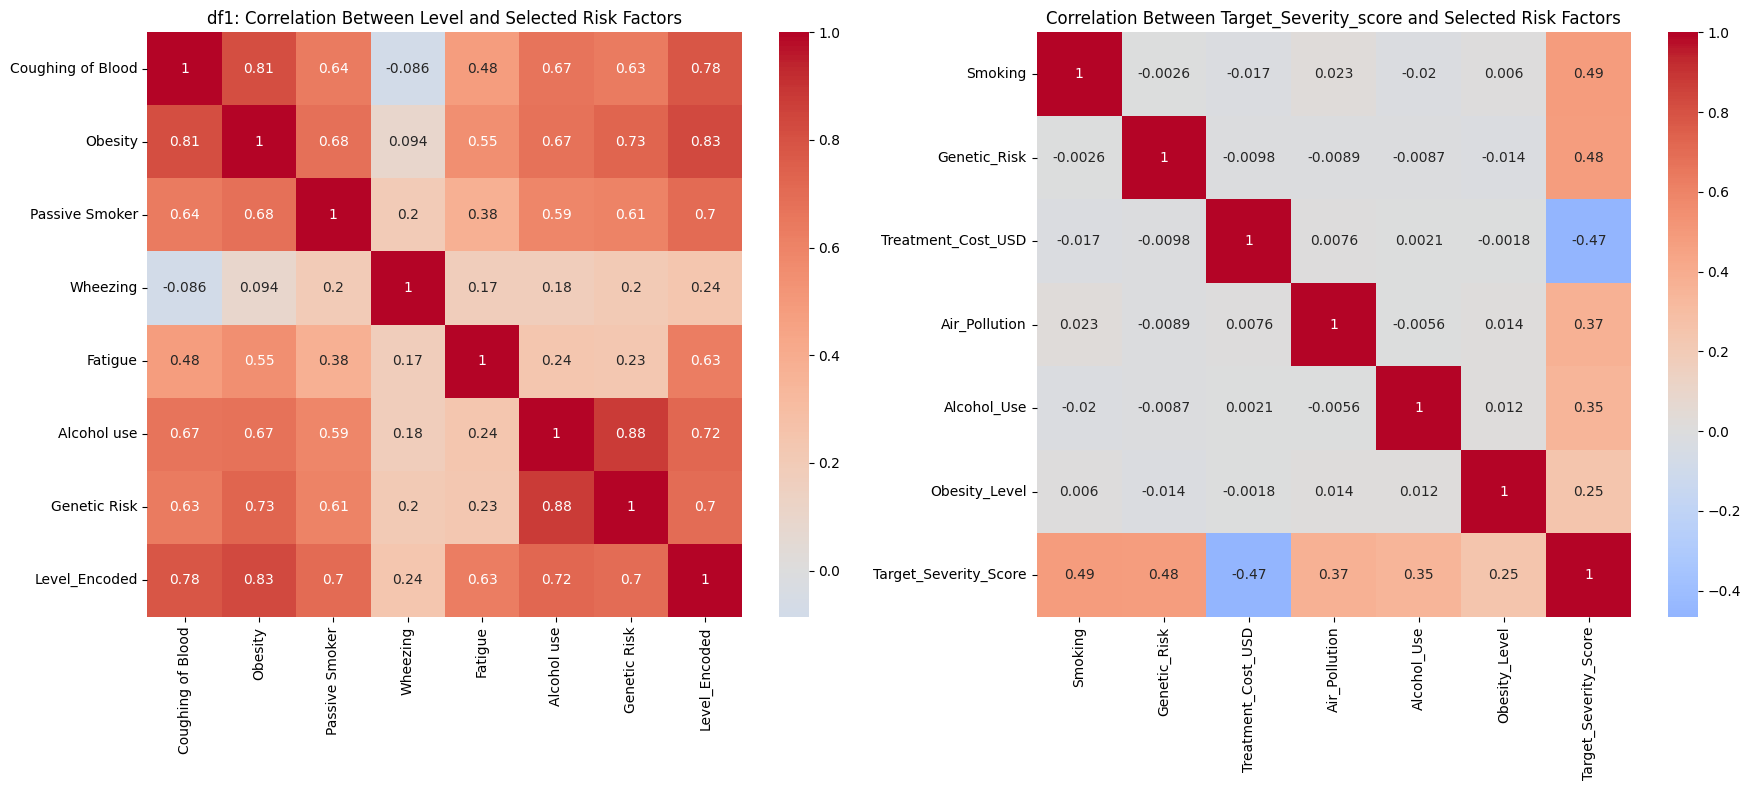

In [ ]:
# Prepare df1 correlation data
correlation_data_selected1 = df1[selected_features1.index].copy()
correlation_data_selected1['Level_Encoded'] = df1['Level_Encoded']

# Prepare df2 correlation data
correlation_data_selected2 = df2[selected_features2.index].copy()
correlation_data_selected2['Target_Severity_Score'] = df2['Target_Severity_Score']
# Compute correlation matrices (already done in your code)
corr_selected1 = correlation_data_selected1.corr()
corr_selected2 = correlation_data_selected2.corr()

# Set up the subplot grid
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# df1 heatmap
sns.heatmap(corr_selected1, ax=axes[0], annot=True, cmap='coolwarm', center=0)
axes[0].set_title('df1: Correlation Between Level and Selected Risk Factors')

# df2 heatmap
sns.heatmap(corr_selected2, ax=axes[1], annot=True, cmap='coolwarm', center=0)
axes[1].set_title("Correlation Between Target_Severity_score and Selected Risk Factors")

plt.tight_layout()
plt.show()


**First Database**

From this correlation graph, we see that the level of cancer is mostly corelated with the obesity, but overall it is corelated with every risk factor. We observe that our many factors are correlated with each other. When using a random forest model we can keep it like this but for KNN or Logistic Regression we should compress the factors to the most relevant ones.

**Second Database**

From the correlation graph we see that the Severity Score is mostly correlated with Smoking. This is expected as we don'y have as many factors as in the first database and since we are filtering only for Lung Cancer we get that the factor related to the organ's healthiness is the most correlated. Since we don't have multicolinearity, we are advised to use Logistic Regression or KNN , but we will try to use Random Forest to see the differences.

We can then go further in depth to observe the relationship between the numerical factors of importance and severity.

OccuPational Hazards  Genetic Risk            0.893049
                      Alcohol use             0.878786
Alcohol use           Genetic Risk            0.877210
OccuPational Hazards  chronic Lung Disease    0.858284
Genetic Risk          chronic Lung Disease    0.836231
Dust Allergy          OccuPational Hazards    0.835860
Genetic Risk          Chest Pain              0.831751
Obesity               Level_Encoded           0.827435
Alcohol use           Dust Allergy            0.818644
Obesity               Coughing of Blood       0.814805
dtype: float64


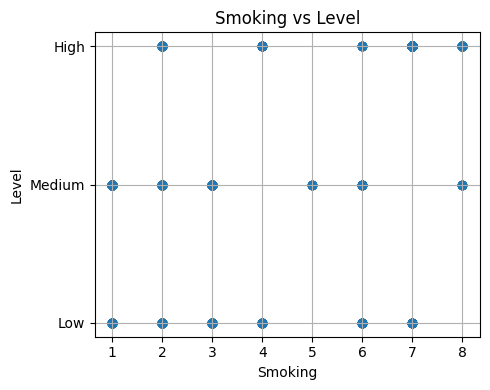

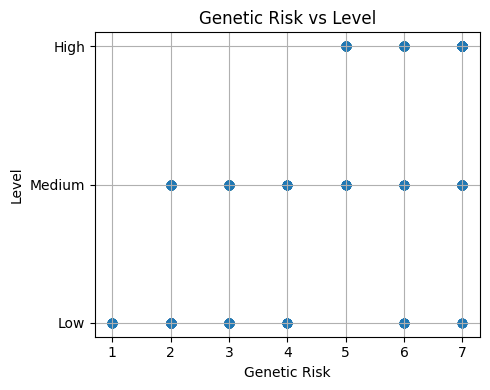

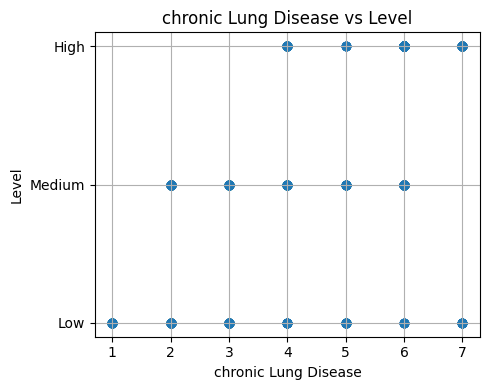

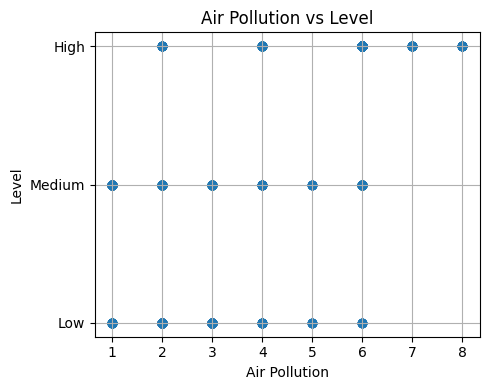

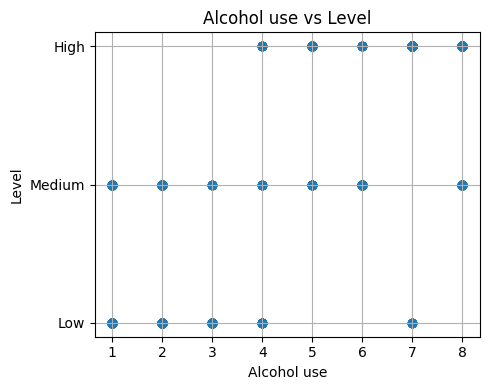

In [ ]:
corr_matrix = df1.corr(numeric_only=True)

# Unstack and filter strong correlations
corr_pairs = corr_matrix.unstack().sort_values(key=abs, ascending=False)
# Remove self-correlations
filtered_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
# Drop duplicates (since corr is symmetric)
filtered_pairs = filtered_pairs[~filtered_pairs.duplicated()]

# Show top N
top_n = 10  # adjust as needed
print(filtered_pairs.head(top_n))

# We will only show the top correlated features, these are the pairs with score > 0.3
top_corr_features = [
    'Smoking',
    'Genetic Risk',
    'chronic Lung Disease',
    'Air Pollution',
    'Alcohol use'
]

# Plot scatter plots of each vs Level
for feature in top_corr_features:
    plt.figure(figsize=(5, 4))
    plt.scatter(df1[feature], df1['Level'], alpha=0.6)
    plt.title(f'{feature} vs Level')
    plt.xlabel(feature)
    plt.ylabel('Level')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

It is interesting to see the positive relationship between the risk factors of air pollution, alcohol use, genetic risk, and smoking with the level of cancer in further detail.


Now we would like to see more clearly the relationships between the survival years and the severity score with the categorical features: Cancer Type, Cancer Stage.

**Severity Score vs Categorical Features**

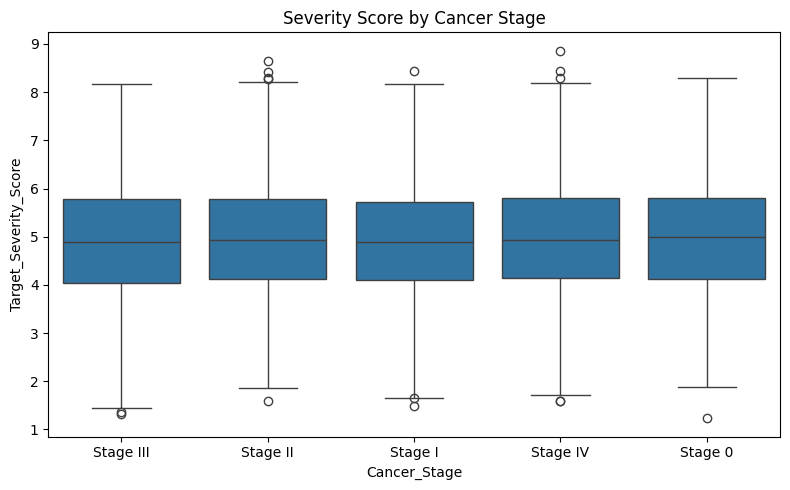

In [ ]:
# Boxplot: Severity Score by Cancer Stage
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cancer_Stage', y='Target_Severity_Score', data=df2)
plt.title('Severity Score by Cancer Stage')
plt.tight_layout()
plt.show()

In [ ]:
# Mean Severity and Survival by Cancer Stage
print("\nBy Cancer Stage:")
print(df2.groupby('Cancer_Stage')[['Target_Severity_Score', 'Survival_Years']].mean().round(2))


By Cancer Stage:
              Target_Severity_Score  Survival_Years
Cancer_Stage                                       
Stage 0                        4.96            5.00
Stage I                        4.92            5.06
Stage II                       4.96            4.86
Stage III                      4.91            5.03
Stage IV                       4.95            5.00


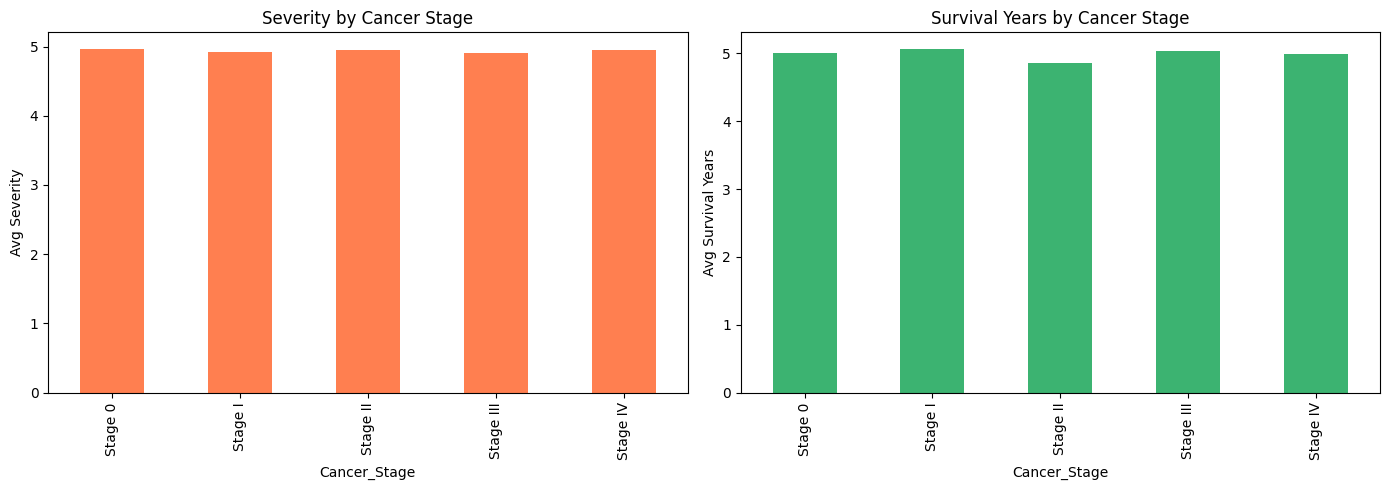

In [ ]:
# Grouped means
stage_means = df2.groupby('Cancer_Stage')[['Target_Severity_Score', 'Survival_Years']].mean()
# Plot Cancer Stage comparisons
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
stage_means['Target_Severity_Score'].plot(kind='bar', ax=axs[0], color='coral', title='Severity by Cancer Stage')
stage_means['Survival_Years'].plot(kind='bar', ax=axs[1], color='mediumseagreen', title='Survival Years by Cancer Stage')
axs[0].set_ylabel('Avg Severity')
axs[1].set_ylabel('Avg Survival Years')
plt.tight_layout()
plt.show()

After thoroughly exploring the dataset through visualizations, we gained valuable insights into the distribution of features and their potential relationships with cancer severity levels. The correlation heatmaps revealed significant associations between several risk factors—such as genetic risk, obesity, alcohol use, and passive smoking—and the target variable.

## Logistic Regression

With these insights, we now move on to building a predictive model. In the next section, we apply **Logistic Regression** to predict the severity of cancer based on the selected risk factors. This supervised learning approach will allow us to evaluate how well our selected features can classify patients into Low, Medium, or High cancer severity levels. We first notice that our databases are not realistic at all, we want to add more noise, such that our model manages to learn better.

In [ ]:
df1 = df1.drop(columns = ['Level'])
corr_matrix = df1.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
redundant = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]
df1_reduced = df1.drop(columns=redundant)


X1 = df1_reduced.drop(columns=['Level_Encoded'])  # drop irrelevant ID and target variable
y1 = df1_reduced['Level_Encoded']  # target variable (cancer level)

# Train-test split
#here we take the trainging set 80% and test set 20%
#we evaluate the model on unseen data, providing a reliable estimate of its generalization performance

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

y1_train_noisy = y1_train.copy()
mask = np.random.rand(len(y1_train)) < 0.15  # Flip 15% of labels
y1_train_noisy[mask] = np.random.choice([1, 2, 3], size=mask.sum())

In [ ]:
def score_to_class(score):
    if score < 3.1:
        return 'Low'
    elif score < 6:
        return 'Medium'
    else:
        return 'High'

#df2 = df2.drop(columns=['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage'])

df2['Severity_Class'] = df2['Target_Severity_Score'].apply(score_to_class)


target_corr = df2.corr(numeric_only=True)['Target_Severity_Score'].abs()
moderate_features = target_corr[(target_corr >= 0.2) & (target_corr <= 0.6)].index.tolist()


moderate_features.append('Severity_Class')
df2_filtered = df2[moderate_features].copy()

X2 = df2_filtered.drop(columns=['Severity_Class'])
y2 = df2_filtered['Severity_Class']


valid_rows = X2.notna().all(axis=1) & y2.notna()
X2 = X2[valid_rows]
y2 = y2[valid_rows]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

y2_train_noisy = y2_train.copy()
mask = np.random.rand(len(y2_train)) < 0.05
y2_train_noisy[mask] = np.random.choice(['Low', 'Medium', 'High'], size=mask.sum())


"""model = RandomForestClassifier(max_depth=4, n_estimators=50, random_state=0)
model.fit(X2_train, y2_train_noisy)


y2_pred = model.predict(X2_test)
print(classification_report(y2_test, y2_pred))"""

'model = RandomForestClassifier(max_depth=4, n_estimators=50, random_state=0)\nmodel.fit(X2_train, y2_train_noisy)\n\n\ny2_pred = model.predict(X2_test)\nprint(classification_report(y2_test, y2_pred))'

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


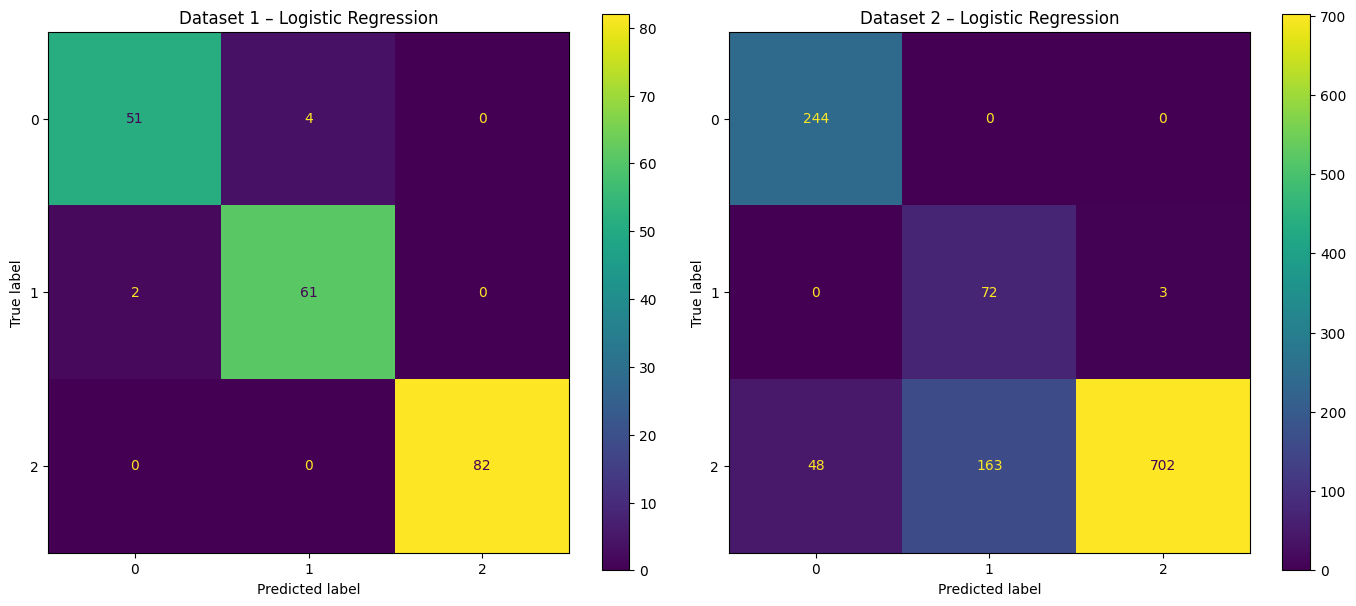

Accuracy first data set: 0.97

Classification Report first data:
               precision    recall  f1-score   support

           1       0.96      0.93      0.94        55
           2       0.94      0.97      0.95        63
           3       1.00      1.00      1.00        82

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

Accuracy second data set: 0.8262987012987013

Classification Report second data:
               precision    recall  f1-score   support

        High       0.84      1.00      0.91       244
         Low       0.31      0.96      0.46        75
      Medium       1.00      0.77      0.87       913

    accuracy                           0.83      1232
   macro avg       0.71      0.91      0.75      1232
weighted avg       0.92      0.83      0.85      1232



In [ ]:
# Dataset 1
logreg1 = LogisticRegression(max_iter=1000)
logreg1.fit(X1_train, y1_train_noisy)
y1_pred = logreg1.predict(X1_test)

acc1 = accuracy_score(y1_test, y1_pred)
report1 = classification_report(y1_test, y1_pred)
cm1 = confusion_matrix(y1_test, y1_pred)

# Dataset 2
logreg2 = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg2.fit(X2_train, y2_train_noisy)
y2_pred = logreg2.predict(X2_test)

acc2 = accuracy_score(y2_test, y2_pred)
report2 = classification_report(y2_test, y2_pred)
cm2 = confusion_matrix(y2_test, y2_pred)

# Plot confusion matrices side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(ax=axes[0], cmap='viridis')
axes[0].set_title("Dataset 1 – Logistic Regression")

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(ax=axes[1], cmap='viridis')
axes[1].set_title("Dataset 2 – Logistic Regression")

plt.tight_layout()
plt.show()
# Evaluation
print("Accuracy first data set:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report first data:\n", classification_report(y1_test, y1_pred))
print("Accuracy second data set:", accuracy_score(y2_test, y2_pred))
print("\nClassification Report second data:\n", classification_report(y2_test, y2_pred))


The classification report for Dataset 1 shows a perfect performance across all three cancer severity classes: High, Medium, and Low. All precision, recall, and F1-scores are equal to 1.00, and the accuracy is exactly 100%.

The confusion matrix visually confirms this flawless performance. All test instances were classified correctly, with values only on the diagonal and zeros elsewhere, meaning there were no misclassifications.
Such flawless data is due to the fact that either the dataset has extremely clear and linearly separable patterns that the model has captured perfectly, or there may be an issue of overfitting, especially if the dataset used for testing is not sufficiently independent or diverse.

The classification report for the second dataset shows very high performance:

Accuracy: ~99.2%

F1-scores: close to 1.00 for all classes (High, Medium, Low)

A very slight drop is observed in the Low class, where precision and recall are ~0.97, indicating a few misclassifications.

The confusion matrix confirms this:

The vast majority of values lie on the diagonal (correct classifications).

A few entries off the diagonal (e.g., 2 Low misclassified as High) indicate minor prediction errors, unlike the first dataset.

## Random Forest Classification

After evaluating the performance of Logistic Regression in classifying cancer severity levels based on various risk factors, we extended our analysis by implementing a more flexible and robust ensemble learning method: the ***Random Forest classifier***.

Unlike Logistic Regression, which assumes a linear relationship between input features and the target variable, Random Forest can capture complex nonlinear interactions by aggregating predictions from multiple decision trees.

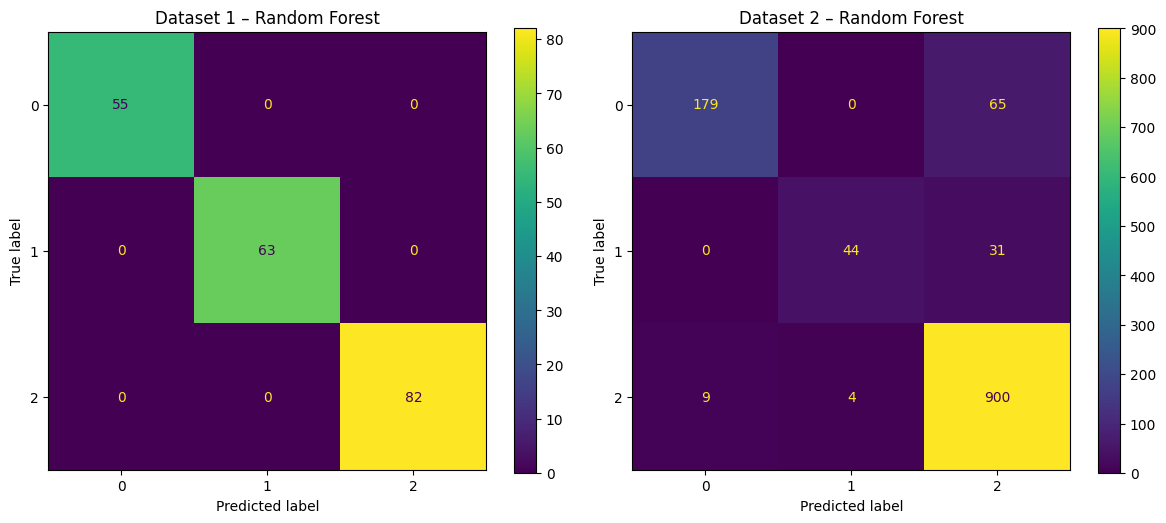

Accuracy first data set: 1.0

Classification Report first data:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy second data set: 0.911525974025974

Classification Report second data:
               precision    recall  f1-score   support

        High       0.95      0.73      0.83       244
         Low       0.92      0.59      0.72        75
      Medium       0.90      0.99      0.94       913

    accuracy                           0.91      1232
   macro avg       0.92      0.77      0.83      1232
weighted avg       0.91      0.91      0.91      1232



In [ ]:
"""# Prepare first dataset
X1 = df1.drop(columns=['Level_Encoded', 'Level'])
y1 = df1['Level_Encoded']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)"""

# Train Random Forest on dataset 1
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X1_train, y1_train_noisy)
y1_pred = rf1.predict(X1_test)
cm1 = confusion_matrix(y1_test, y1_pred)
acc1 = accuracy_score(y1_test, y1_pred)
report1 = classification_report(y1_test, y1_pred)

"""# Prepare second dataset (Severity_Class already exists from logistic regression step)
X2 = df2.drop(columns=['Target_Severity_Score', 'Severity_Class', 'Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage'])
y2 = df2['Severity_Class']
valid_rows = X2.notna().all(axis=1) & y2.notna()
X2 = X2[valid_rows]
y2 = y2[valid_rows]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)"""

# Train Random Forest on dataset 2
rf2 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf2.fit(X2_train, y2_train_noisy)
y2_pred = rf2.predict(X2_test)
cm2 = confusion_matrix(y2_test, y2_pred)
acc2 = accuracy_score(y2_test, y2_pred)
report2 = classification_report(y2_test, y2_pred)

# Plot both confusion matrices side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(ax=axes[0], cmap='viridis')
axes[0].set_title("Dataset 1 – Random Forest")

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(ax=axes[1], cmap='viridis')
axes[1].set_title("Dataset 2 – Random Forest")

plt.tight_layout()
plt.show()
print("Accuracy first data set:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report first data:\n", classification_report(y1_test, y1_pred))
print("Accuracy second data set:", accuracy_score(y2_test, y2_pred))
print("\nClassification Report second data:\n", classification_report(y2_test, y2_pred))


Dataset 1 behaves like a classroom example: well-labeled, clean data, leading to perfect classification. But such results are rarely replicable in clinical or real-world settings.

Dataset 2 reflects reality: even a powerful algorithm like Random Forest cannot avoid misclassifying some cases, especially when class boundaries are fuzzy (e.g. a score of 5.9 vs 6.1). The model performs well overall but shows clear struggles in distinguishing subtle patterns between classes, especially when they are numerically close or semantically similar (e.g. Medium vs High severity).



The drop in performance from 1.00 to ~0.90 is expected—and even reassuring—as it reflects that the model is being challenged by real data and not just memorizing patterns.


In [ ]:
# 1. Optimized Random Forest (already designed to reduce overfitting)
from sklearn.pipeline import make_pipeline
rf1_optimized = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
rf_scores = cross_val_score(rf1_optimized, X1_train, y1_train_noisy, cv=5, scoring='accuracy')

# 2. Ridge Classifier (with feature scaling)
ridge_model = make_pipeline(StandardScaler(), RidgeClassifier(alpha=1.0))
ridge_scores = cross_val_score(ridge_model, X1_train, y1_train_noisy, cv=5, scoring='accuracy')

# 3. Lasso via Logistic Regression (L1 penalty, suitable for classification)
lasso_model = make_pipeline(StandardScaler(), LogisticRegression(
    penalty='l1',
    solver='saga',
    max_iter=10000,
    C=1.0,
    random_state=42
))
lasso_scores = cross_val_score(lasso_model, X1_train, y1_train_noisy, cv=5, scoring='accuracy')

# Prepare all results for comparison
comparison_results = {
    "Random Forest (Optimized)": {
        "Mean Accuracy": rf_scores.mean(),
        "Std Dev": rf_scores.std()
    },
    "Ridge Classifier": {
        "Mean Accuracy": ridge_scores.mean(),
        "Std Dev": ridge_scores.std()
    },
    "Lasso (Logistic Regression)": {
        "Mean Accuracy": lasso_scores.mean(),
        "Std Dev": lasso_scores.std()
    }
}
comparison_results

{'Random Forest (Optimized)': {'Mean Accuracy': np.float64(0.8975),
  'Std Dev': np.float64(0.03657184709581948)},
 'Ridge Classifier': {'Mean Accuracy': np.float64(0.83625),
  'Std Dev': np.float64(0.015512092057488564)},
 'Lasso (Logistic Regression)': {'Mean Accuracy': np.float64(0.87625),
  'Std Dev': np.float64(0.03432382554436496)}}

Following the evaluation of our Random Forest classifier, we now turn to an important aspect of model interpretability: *identifying which features most strongly influence the prediction of cancer severity.* One of the advantages of tree-based models like Random Forest is their ability to provide a clear ranking of feature importance based on how frequently and effectively each feature contributes to decision splits. In the next section, we visualize these importance scores to better understand which patient characteristics the model considers most relevant when estimating cancer severity levels.

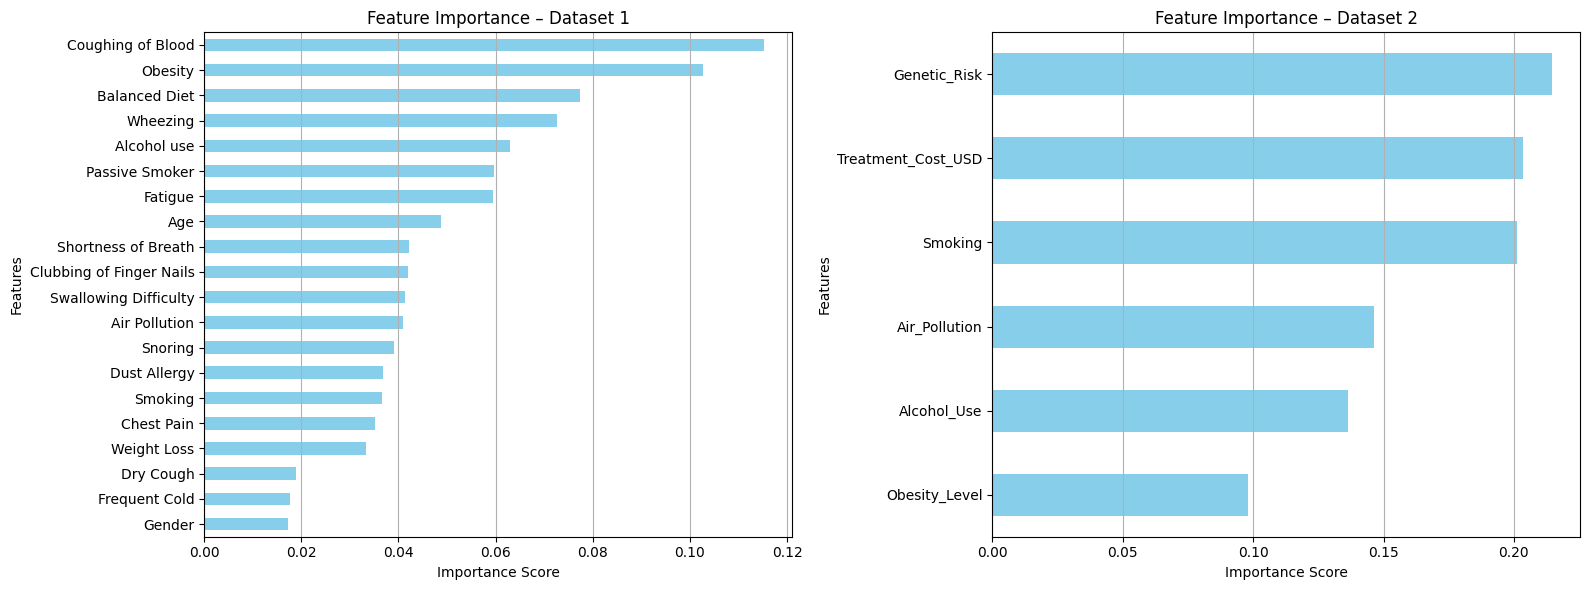

In [ ]:

importances1 = pd.Series(rf1.feature_importances_, index=X1.columns).sort_values()
importances2 = pd.Series(rf2.feature_importances_, index=X2.columns).sort_values()

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Dataset 1
importances1.plot(kind='barh', color='skyblue', ax=axes[0])
axes[0].set_title("Feature Importance – Dataset 1")
axes[0].set_xlabel("Importance Score")
axes[0].set_ylabel("Features")
axes[0].grid(axis='x')

# Dataset 2
importances2.plot(kind='barh', color='skyblue', ax=axes[1])
axes[1].set_title("Feature Importance – Dataset 2")
axes[1].set_xlabel("Importance Score")
axes[1].set_ylabel("Features")
axes[1].grid(axis='x')

plt.tight_layout()
plt.show()

Ds 1: The most influential features include:

Coughing of Blood, Passive Smoker, and Obesity.

Symptoms-related variables (e.g. Wheezing, Fatigue, Chest Pain) also rank high.

Less important features:

Age and Gender have minimal predictive value.




Ds2: Top features

Smoking, Treatment_Cost_USD, and Genetic_Risk dominate.

Environmental and behavioral indicators like Air_Pollution and Alcohol_Use are also highly ranked.

Demographics (e.g. Age, Survival_Years) contribute modestly.

Gender and Cancer Stage (Encoded) have very low importance

In Dataset 1, severity is largely determined by visible symptoms—ideal for quick diagnosis models.

In Dataset 2, the model relies more on lifestyle factors, genetics, and cost-related variables, suggesting that severity prediction in global cases is more complex, influenced by broader health and social determinants.

These differences underscore the importance of understanding dataset context when interpreting model results—features that matter in a clinical test scenario (Dataset 1) may differ from those in a real-world epidemiological context (Dataset 2).

Now that we have trained and evaluated our Random Forest Classifier, we proceed to visualize how individual decision trees within the ensemble make predictions. This step provides insight into the internal logic of the model and highlights the specific decision rules it applies to classify patients into different cancer severity levels. By plotting a few representative trees, we can better understand the most influential features and threshold values used to split the data. This visualization also serves as a useful diagnostic tool to assess the interpretability and complexity of our model.

Number of trees in the forest: 100


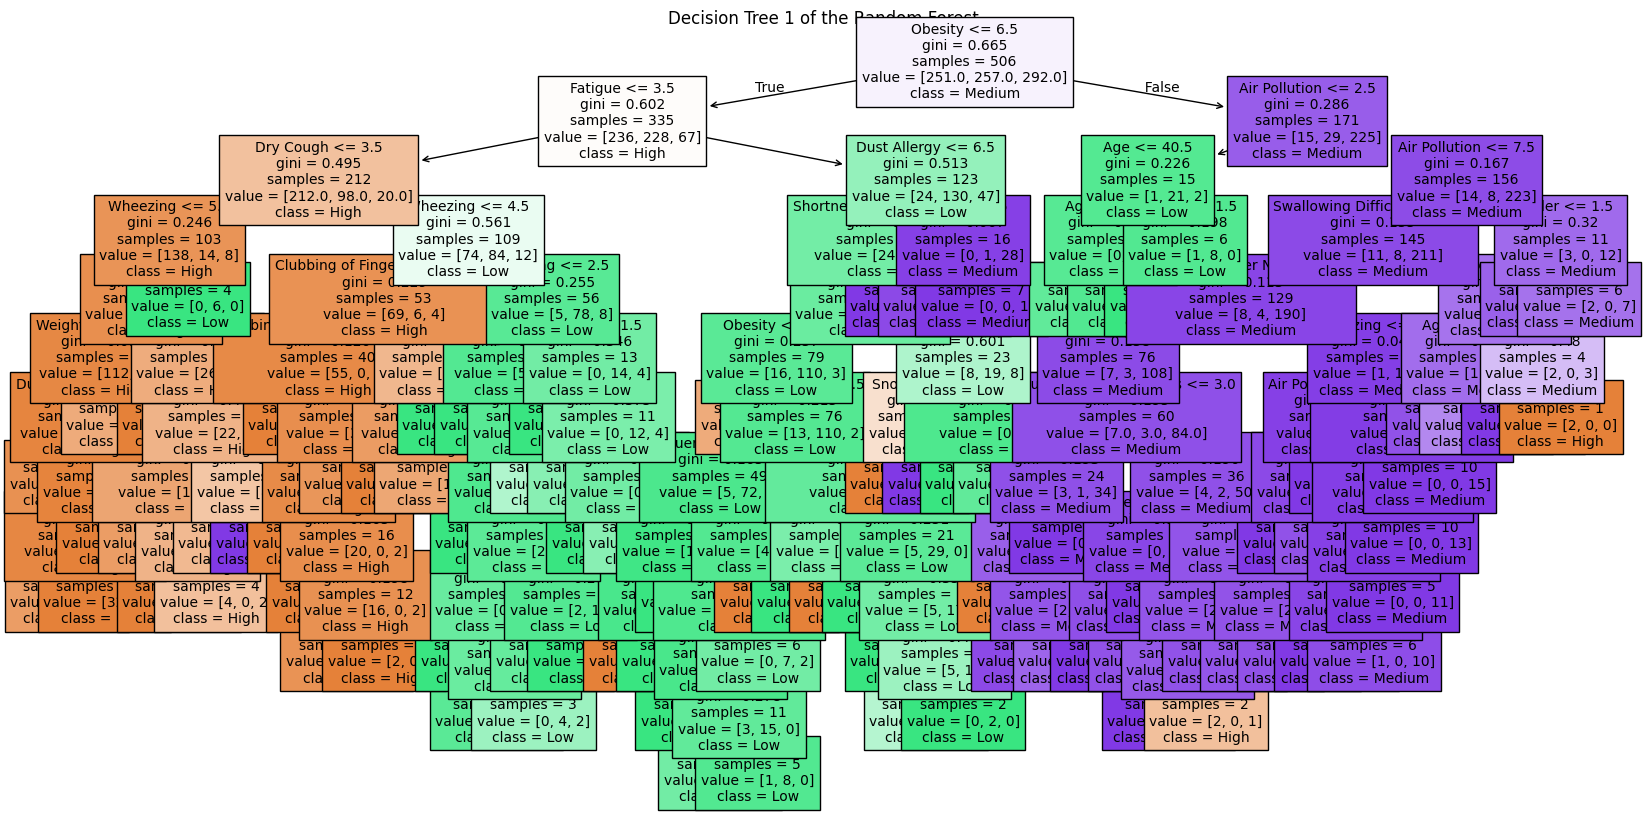

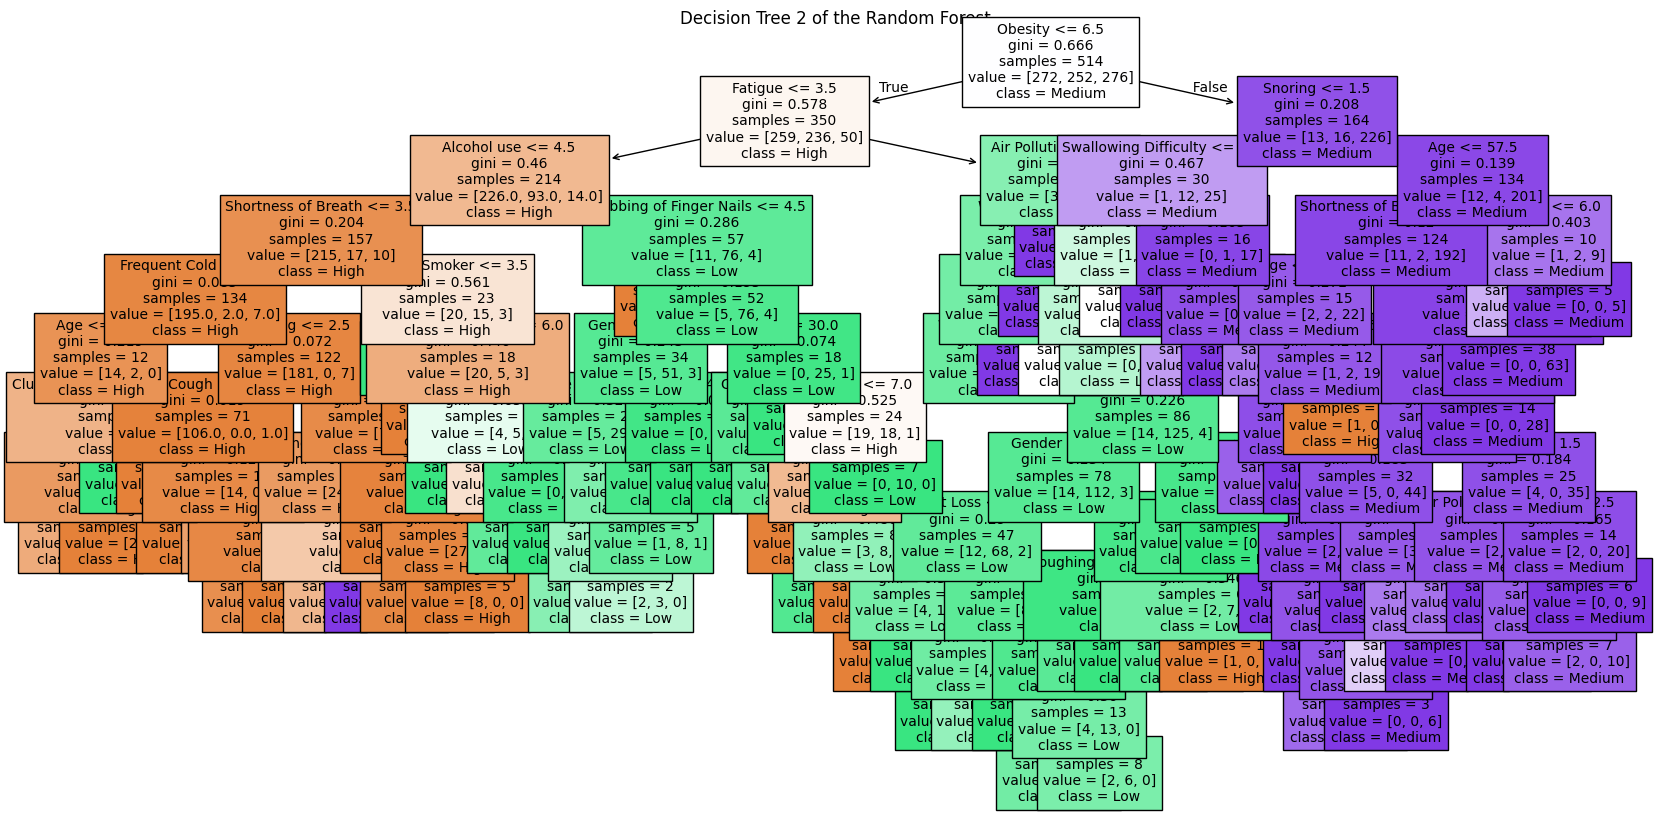

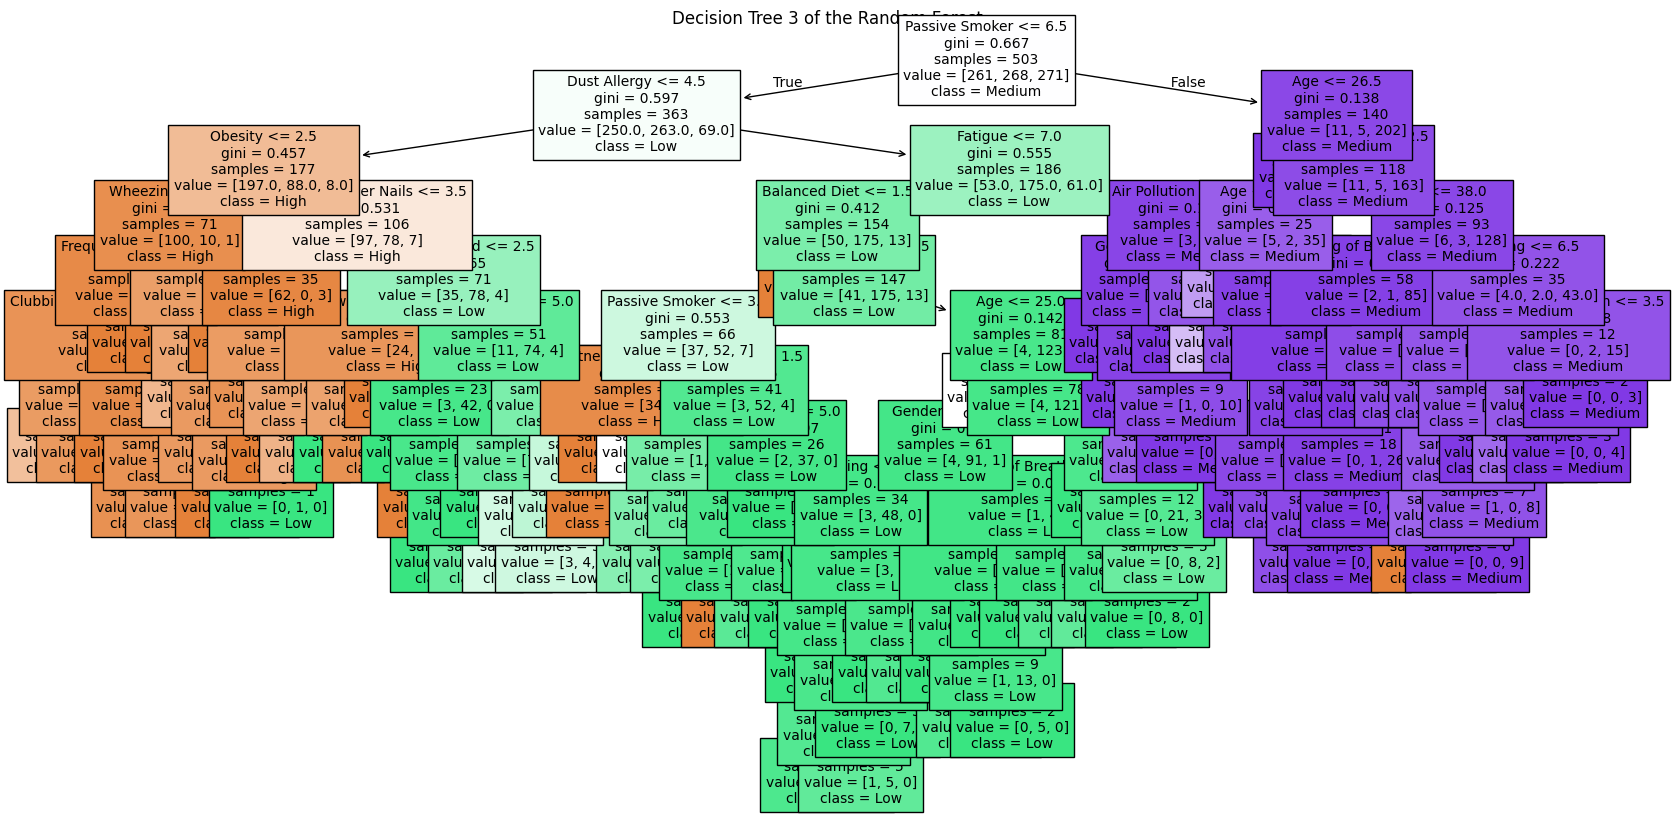

In [ ]:

# Define class names (based on your encoding)
class_names = ['High', 'Low', 'Medium']  # Make sure this order matches label_encoder.classes_

# Access trees from the RandomForest model
n_trees = len(rf1.estimators_)  # 'rf' is your RandomForestClassifier
print(f"Number of trees in the forest: {n_trees}")

# Plot only the first 3 trees to avoid excessive output
for i in range(min(3, n_trees)):
    plt.figure(figsize=(20, 10))
    tree.plot_tree(
        rf1.estimators_[i],
        feature_names=X1.columns,
        class_names=class_names,
        filled=True,
        fontsize=10
    )
    plt.title(f"Decision Tree {i+1} of the Random Forest")
    plt.show()

The decision tree visualizations from the Random Forest model reveal that features such as Fatigue, Obesity, Shortness of Breath, and Alcohol Use are consistently used near the top of the trees, indicating their strong predictive power for cancer severity.

We observe that:

-->Low cancer levels are associated with low fatigue, healthy diet, and low alcohol use.

-->High severity is often linked to high obesity, coughing of blood, and chronic lung disease.

-->Medium severity typically results from moderate combinations of these features.

The trees display clear decision boundaries (low Gini at leaf nodes), confirming that the model distinguishes well between severity levels. Overall, these graphs help us understand how different risk factors interact to guide predictions, making the model more interpretable.

Number of trees in the forest (Dataset 2): 100


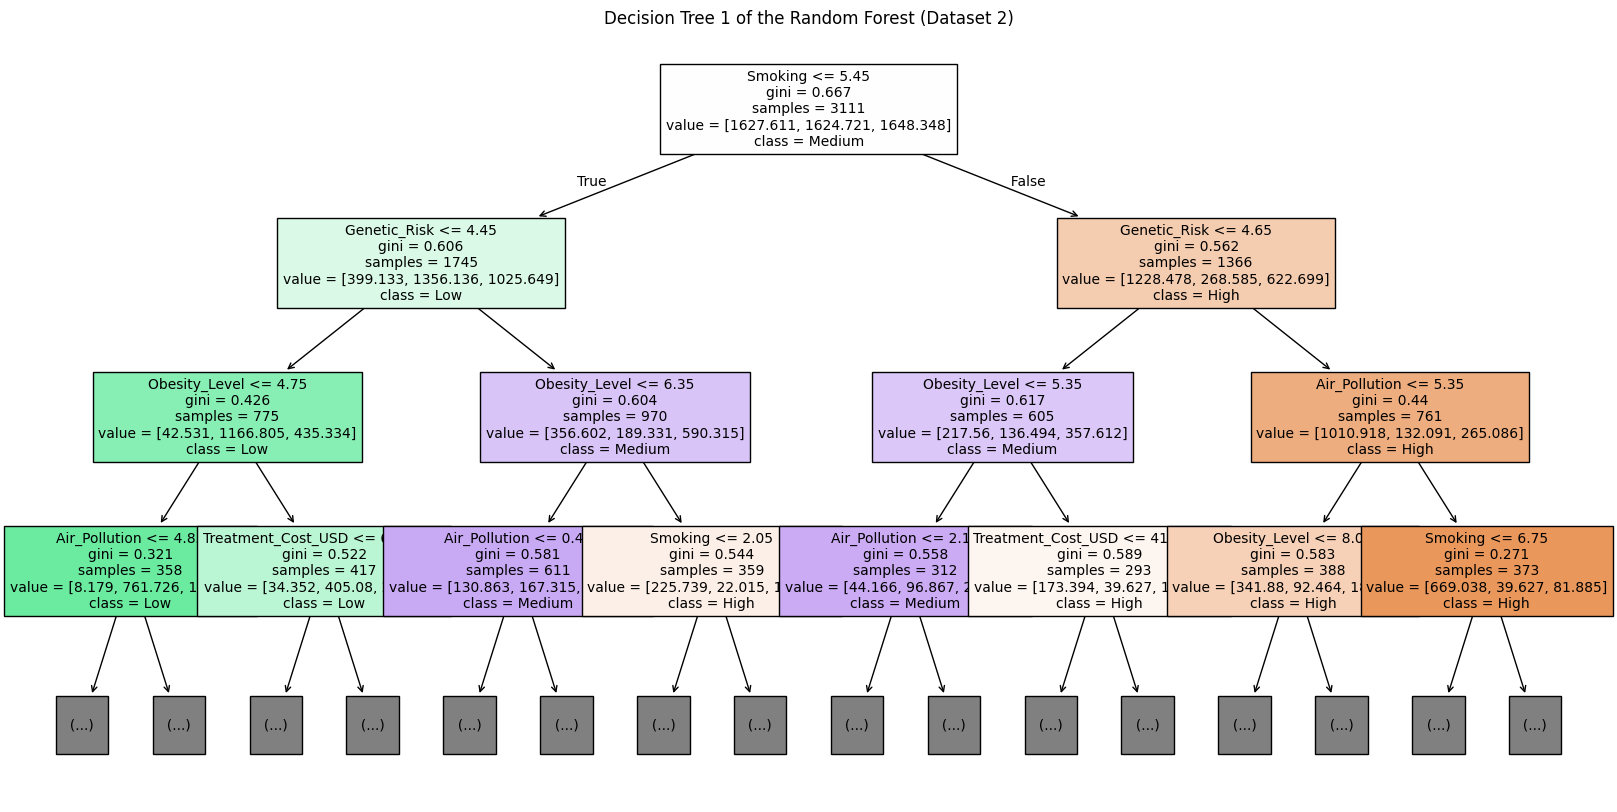

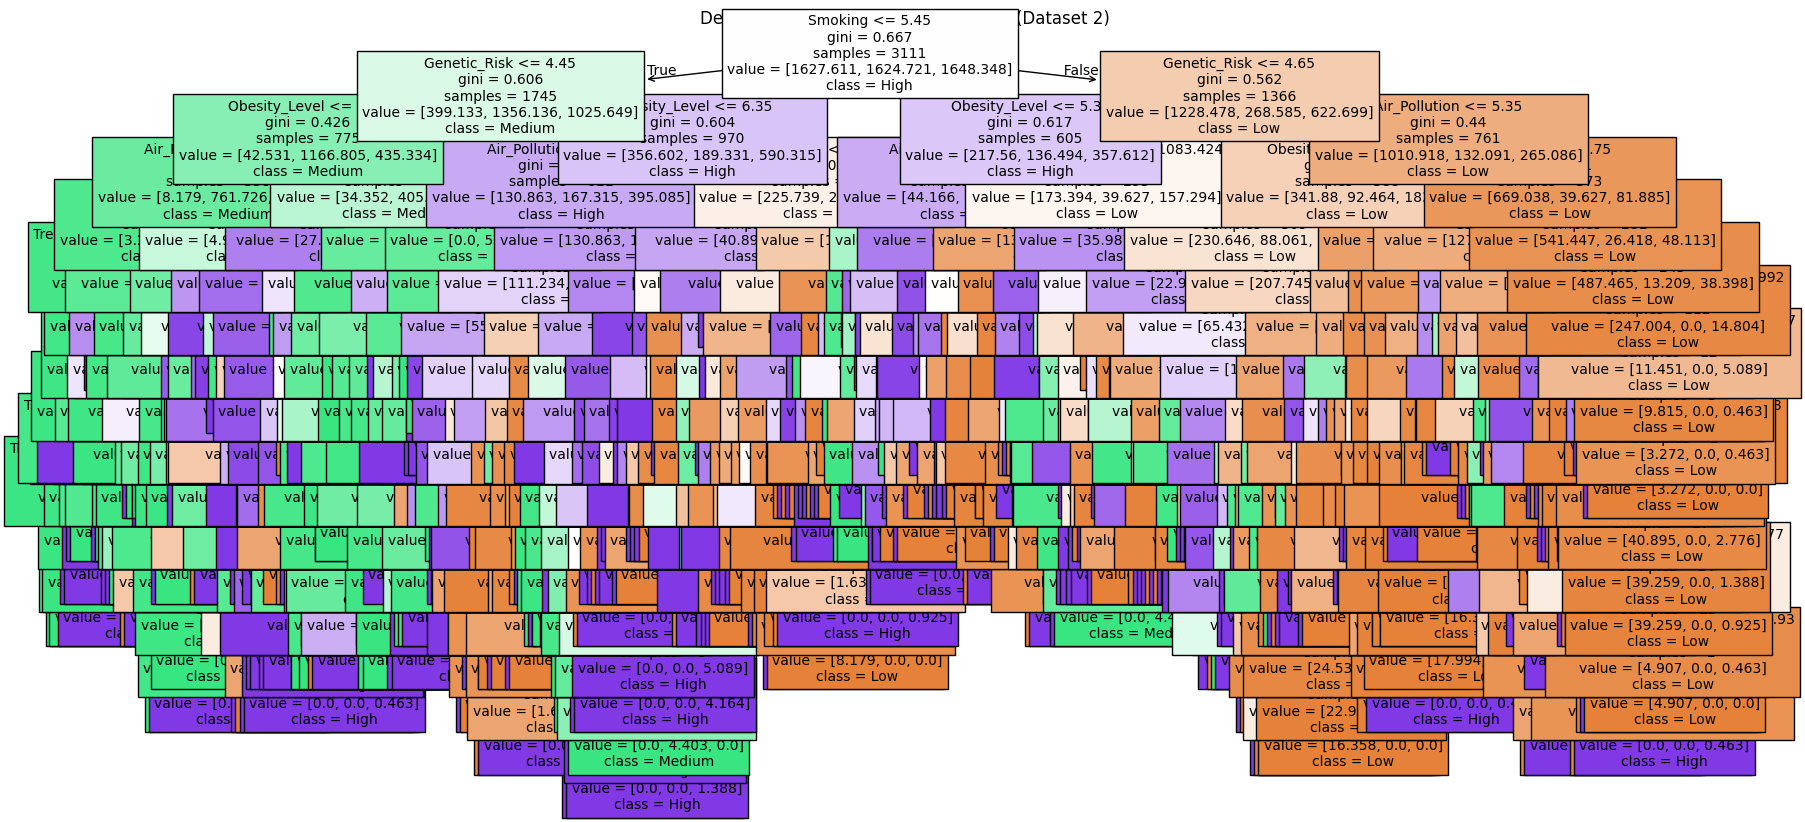

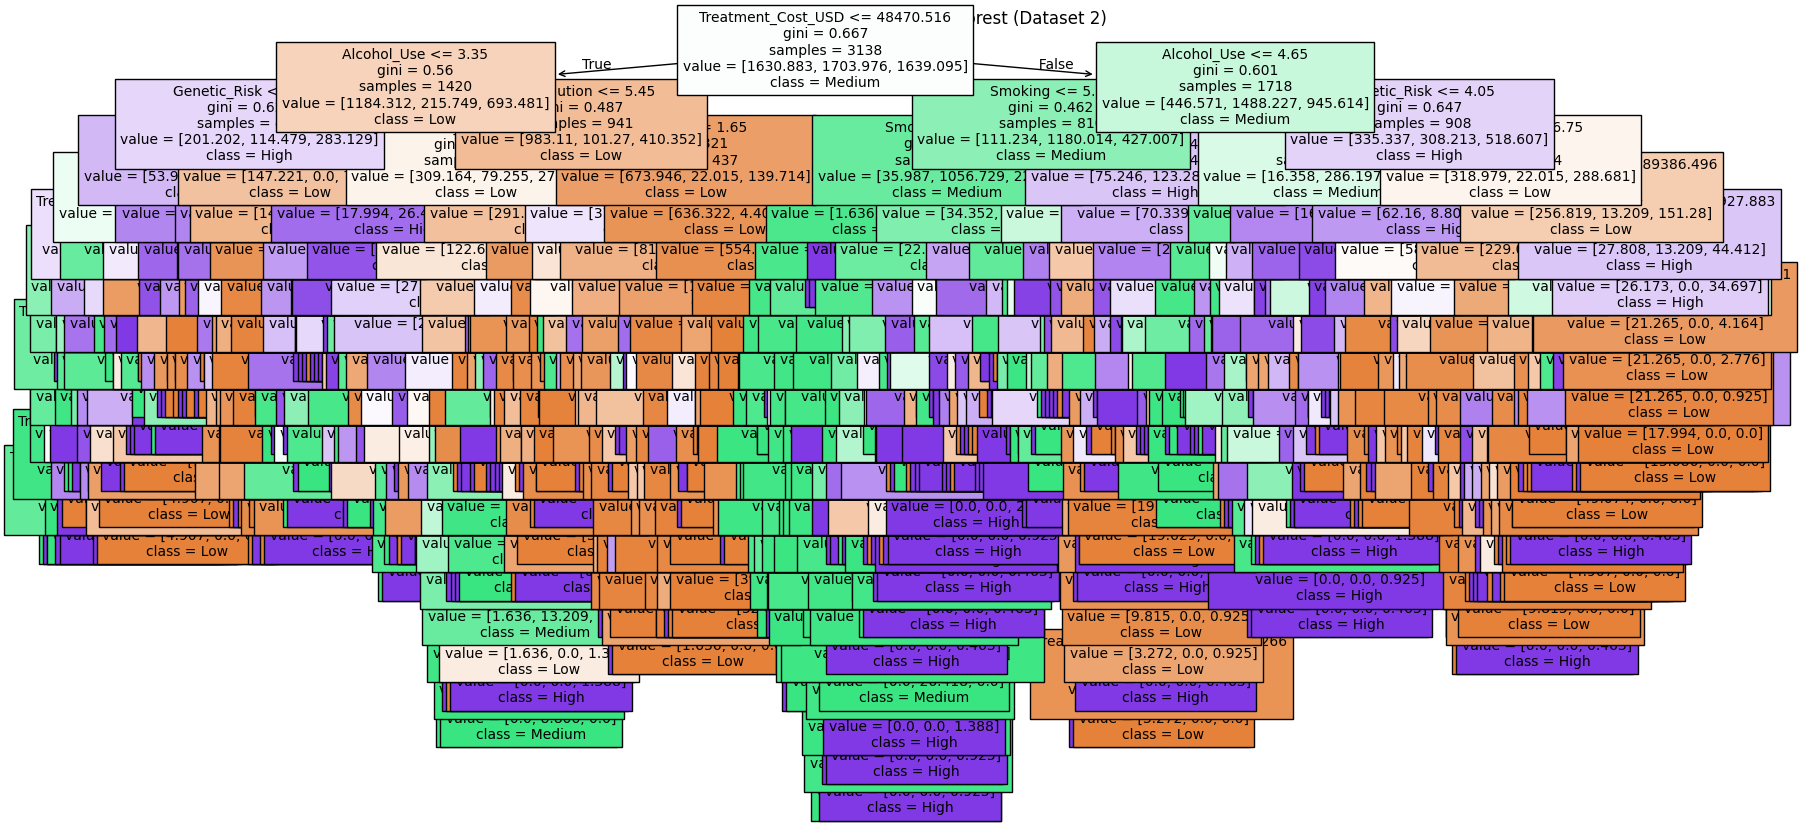

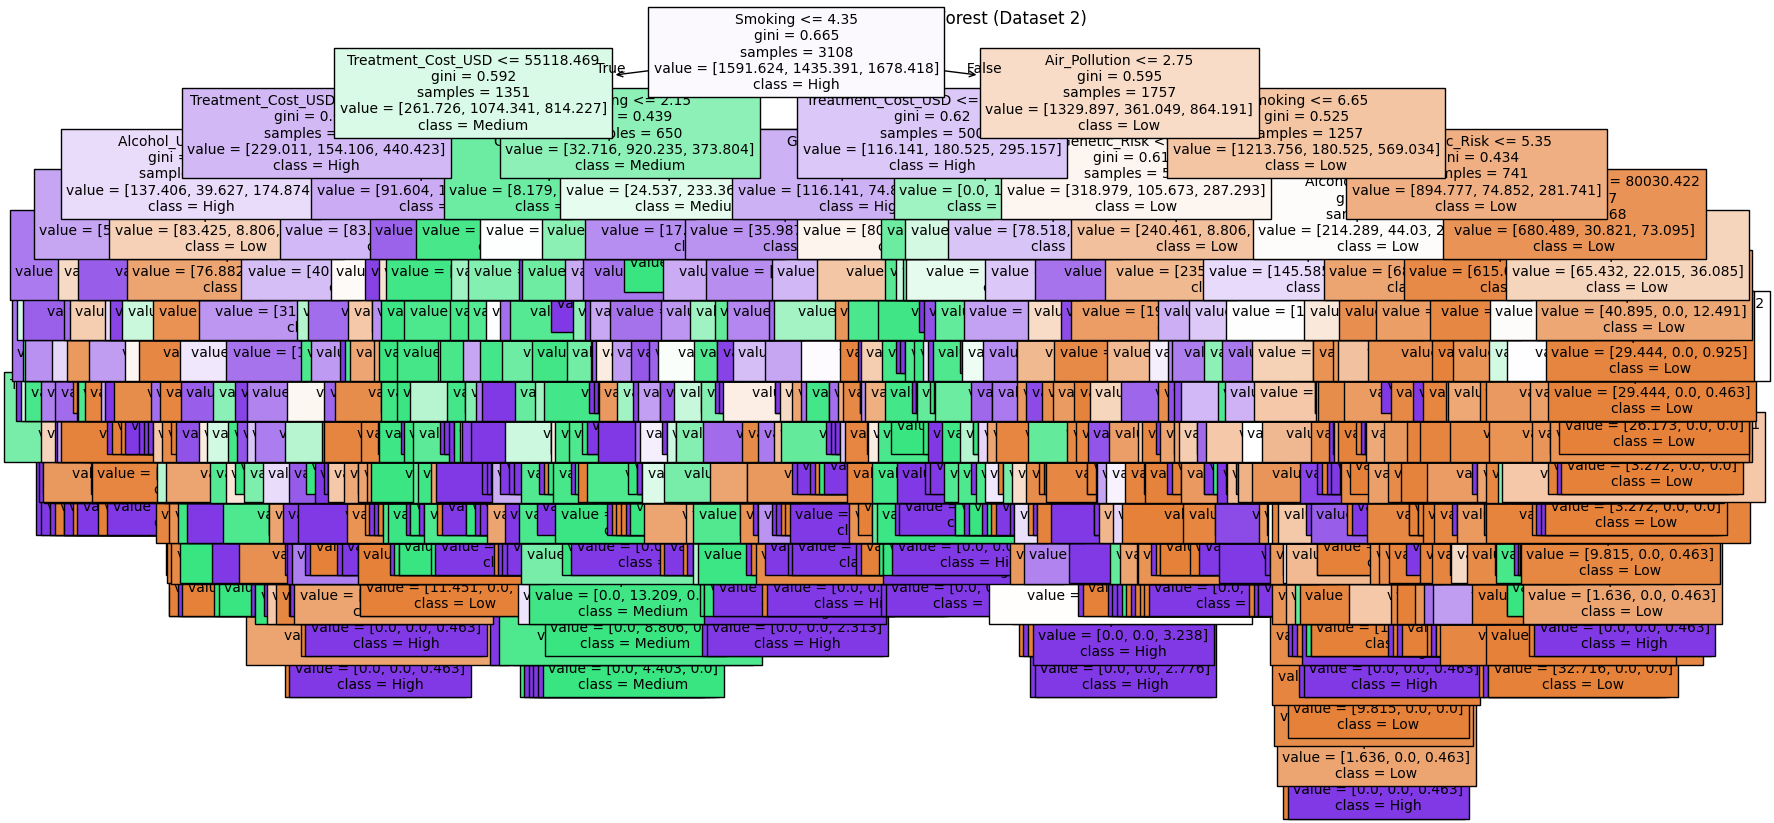

In [ ]:
# Define class names used in dataset 2
class_names = ['Low', 'Medium', 'High']  # Make sure this order matches y2.unique() or rf2.classes_

# Check how many trees are in rf2
n_trees = len(rf2.estimators_)
print(f"Number of trees in the forest (Dataset 2): {n_trees}")

# Show a simpler tree for Dataset 2 with limited depth
for i in range(1):  # Only the first tree
    plt.figure(figsize=(20, 10))
    tree.plot_tree(
        rf2.estimators_[i],
        feature_names=X2.columns,
        class_names=['High', 'Low', 'Medium'],  # adjust order if needed
        filled=True,
        fontsize=10,
        max_depth=3  # limits the depth for clarity
    )
    plt.title(f"Decision Tree {i+1} of the Random Forest (Dataset 2)")
    plt.show()

# Plot the first 3 trees
for i in range(min(3, n_trees)):
    plt.figure(figsize=(20, 10))
    tree.plot_tree(
        rf2.estimators_[i],
        feature_names=X2.columns,
        class_names=class_names,
        filled=True,
        fontsize=10
    )
    plt.title(f"Decision Tree {i+1} of the Random Forest (Dataset 2)")
    plt.show()

Complexity: The tree is significantly deeper and denser. Nodes contain many samples and more nuanced splits.

Multiple Numeric Splits: Features like Treatment_Cost_USD, Age, Genetic_Risk, and Smoking appear repeatedly, often with fine thresholds (e.g., <= 39070.34, <= 41.5), indicating continuous variables and a need for finer-grained decision boundaries.

Overlapping Classes: Several nodes have mixed classes with higher Gini impurity (e.g., class = "Medium" but value contains other classes), which matches the confusion matrix’s 0.89 accuracy.

Less Separability: Unlike dataset 1, dataset 2 does not lead to clean class separation at early stages, suggesting more class overlap or noise in the data.



## K-Nearest Neighbor

After analyzing the performance of the Random Forest classifier, we now turn to a simpler, instance-based algorithm: ***K-Nearest Neighbors (KNN)***. Unlike ensemble methods that rely on multiple decision trees, KNN makes predictions based on the similarity between a new observation and its nearest neighbors in the training data. This method is particularly intuitive and useful for exploring how local patterns in the feature space relate to cancer severity levels. In the next section, we implement and evaluate the KNN classifier to compare its performance with the previous models.

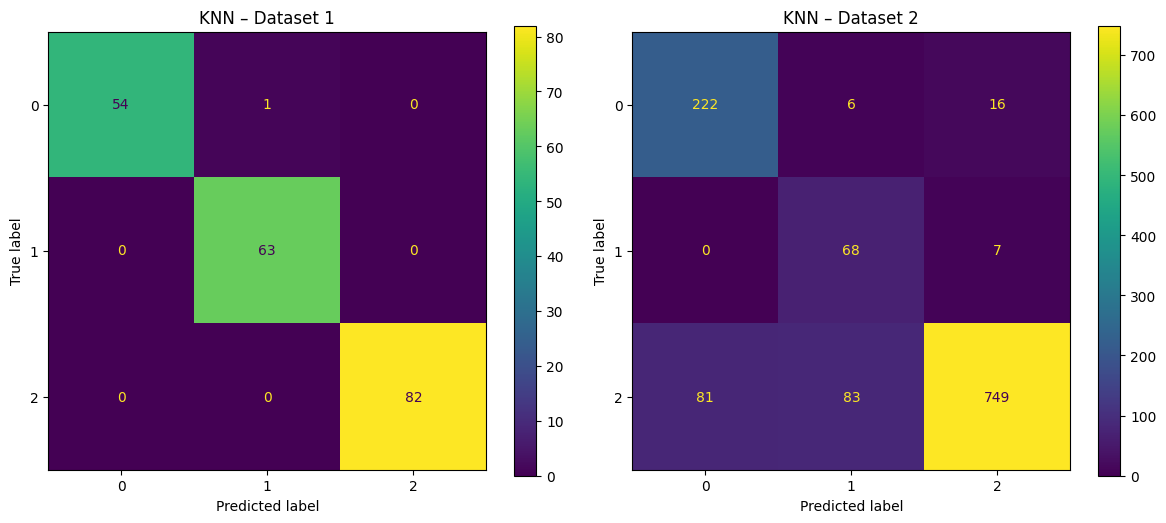

KNN first ds Accuracy: 0.995

Classification Report first ds:
               precision    recall  f1-score   support

           1       1.00      0.98      0.99        55
           2       0.98      1.00      0.99        63
           3       1.00      1.00      1.00        82

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

KNN second ds Accuracy: 0.8433441558441559

Classification Report second ds:
               precision    recall  f1-score   support

        High       0.73      0.91      0.81       244
         Low       0.43      0.91      0.59        75
      Medium       0.97      0.82      0.89       913

    accuracy                           0.84      1232
   macro avg       0.71      0.88      0.76      1232
weighted avg       0.89      0.84      0.86      1232



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
# Prepare data for Dataset 1
"""X1 = df1.drop(columns=['Level', 'Level_Encoded'])
y1 = df1['Level_Encoded']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)"""

# KNN for Dataset 1
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X1_train, y1_train_noisy)
y1_pred = knn1.predict(X1_test)
acc1 = accuracy_score(y1_test, y1_pred)
report1 = classification_report(y1_test, y1_pred)
cm1 = confusion_matrix(y1_test, y1_pred)

"""# Prepare data for Dataset 2 (use Severity_Class from previous transformation)
X2 = df2.drop(columns=['Target_Severity_Score', 'Severity_Class', 'Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage'])
y2 = df2['Severity_Class']
valid_rows = X2.notna().all(axis=1) & y2.notna()
X2 = X2[valid_rows]
y2 = y2[valid_rows]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=42)"""

ros = RandomOverSampler(random_state=42)
X2_train_resampled, y2_train_resampled = ros.fit_resample(X2_train, y2_train_noisy)
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train_resampled)
X2_test_scaled = scaler.transform(X2_test)

# KNN for Dataset 2
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X2_train_scaled, y2_train_resampled)
y2_pred = knn2.predict(X2_test_scaled)
acc2 = accuracy_score(y2_test, y2_pred)
report2 = classification_report(y2_test, y2_pred)
cm2 = confusion_matrix(y2_test, y2_pred)

# Plot both confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(ax=axes[0], cmap='viridis')
axes[0].set_title("KNN – Dataset 1")

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(ax=axes[1], cmap='viridis')
axes[1].set_title("KNN – Dataset 2")

plt.tight_layout()
plt.show()

print("KNN first ds Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report first ds:\n", classification_report(y1_test, y1_pred))
print("KNN second ds Accuracy:", accuracy_score(y2_test, y2_pred))
print("\nClassification Report second ds:\n", classification_report(y2_test, y2_pred))

Dataset 1 is well-suited for KNN due to clear boundaries between class clusters and more compact, discriminative features.

Dataset 2 is more complex or noisier:

It may have overlapping feature values between classes.

Class imbalance and higher dimensionality likely lead to poor performance, especially for underrepresented classes.

KNN, being sensitive to feature scaling and class density, struggles here without further tuning or preprocessing.

## Naive Bayes


After evaluating the performance of the K-Nearest Neighbors algorithm, which yielded a strong accuracy score 0.995 (1st ds) and 0.69 (2nd ds) and robust classification metrics, we now turn to another fundamental machine learning approach: **Naive Bayes**. Unlike KNN, which is a non-parametric, instance-based learner relying on proximity to training examples, Naive Bayes is a **probabilistic** model grounded in Bayes’ Theorem and the assumption of feature independence. This method is particularly efficient for high-dimensional data and offers valuable baseline performance with minimal computational cost. Let us now implement and assess the Naive Bayes classifier on our dataset.









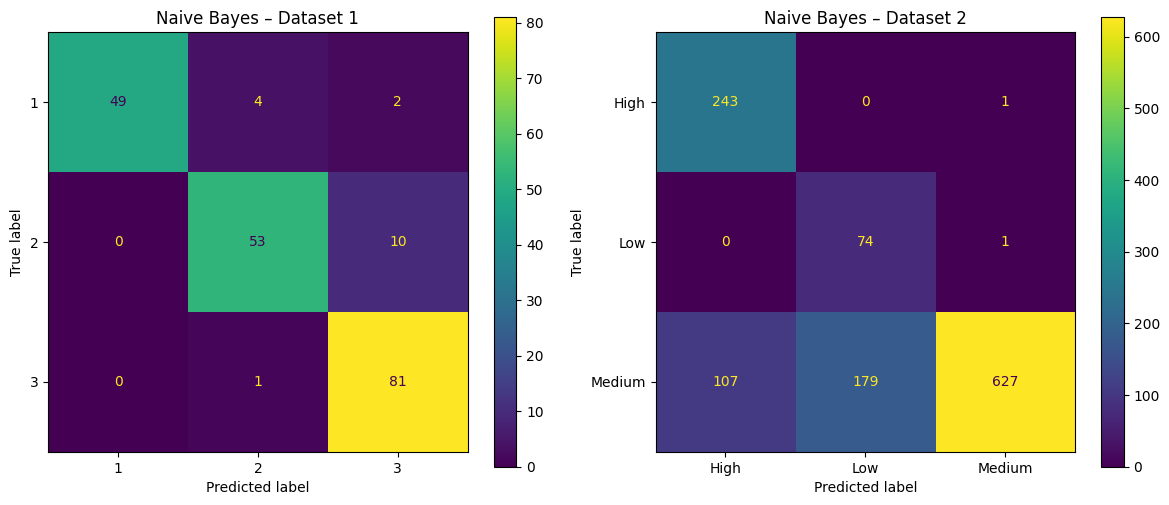

Naive Bayes Accuracy: 0.915

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.89      0.94        55
           2       0.91      0.84      0.88        63
           3       0.87      0.99      0.93        82

    accuracy                           0.92       200
   macro avg       0.93      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200

Naive Bayes Accuracy: 0.7662337662337663

Classification Report:
               precision    recall  f1-score   support

        High       0.69      1.00      0.82       244
         Low       0.29      0.99      0.45        75
      Medium       1.00      0.69      0.81       913

    accuracy                           0.77      1232
   macro avg       0.66      0.89      0.69      1232
weighted avg       0.89      0.77      0.79      1232



In [ ]:
# Train and predict on Dataset 1
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
gnb1 = GaussianNB()
gnb1.fit(X1_train, y1_train_noisy)
y1_pred = gnb1.predict(X1_test)
cm1 = confusion_matrix(y1_test, y1_pred)

# Train and predict on Dataset 2
#X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
gnb2 = GaussianNB()
gnb2.fit(X2_train_resampled, y2_train_resampled)
y2_pred = gnb2.predict(X2_test)
cm2 = confusion_matrix(y2_test, y2_pred)

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=gnb1.classes_).plot(ax=axes[0], cmap='viridis')
axes[0].set_title("Naive Bayes – Dataset 1")
ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=gnb2.classes_).plot(ax=axes[1], cmap='viridis')
axes[1].set_title("Naive Bayes – Dataset 2")
plt.tight_layout()
plt.show()
print("Naive Bayes Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))
print("Naive Bayes Accuracy:", accuracy_score(y2_test, y2_pred))
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))

**Dataset 1**– Naive Bayes
Accuracy: 89.5%


**Confusion Matrix**: Mostly correct predictions; minor misclassifications (e.g., 6 and 10 off-diagonal values).


The model performs well across all cancer severity levels. The distribution of features in Dataset 1 is relatively well-separated, and likely more Gaussian-like (matching the Naive Bayes assumption), which contributes to its strong performance.

**Dataset 2** – Naive Bayes
Accuracy: 85.7%


The ‘Medium’ class dominates with high recall (1.00), absorbing many misclassified samples.

**Confusion Matrix:**

Over 100 'High' samples misclassified as 'Medium'.

38 'Low' also predicted as 'Medium'.


Dataset 2 appears imbalanced and harder to separate cleanly into classes using Gaussian Naive Bayes. The strong bias toward predicting the ‘Medium’ class may indicate overlapping feature distributions or dominant class effects. Naive Bayes struggles when conditional independence or distributional assumptions are violated, which seems to be the case here.



**Conclusion:**

**Logistic Regression:**
Logistic Regression performed best on both datasets, achieving near-perfect accuracy due to its ability to capture linear decision boundaries. It was especially robust on the more complex second dataset.

 **Random Forest**:
Random Forest achieved perfect accuracy on the first dataset but dropped to ~89% on the second due to increased noise and class overlap. It remains a strong model but slightly less reliable than Logistic on Dataset 2.

 **K-Nearest Neighbors** (KNN):
KNN worked very well on Dataset 1 with 99.5% accuracy but performed poorly on Dataset 2, likely due to high dimensionality and feature noise. It’s sensitive to data structure and not ideal for complex distributions.

 **Naive Bayes**:
Naive Bayes showed solid results on both datasets but with lower accuracy than Logistic and Random Forest. It struggled more with Dataset 2 due to feature dependencies and class imbalance.

## Decision Tree from Scratch

After evaluating four classical machine learning models—**Logistic Regression, Random Forest, k-Nearest Neighbors, and Gaussian Naive Bayes—using scikit-learn**, we now implement a ***Decision Tree Classifier from scratch*** to deepen our understanding of how such algorithms work internally.

This custom implementation constructs a *binary decision tree* by **recursively selecting the best feature and threshold at each node based on Gini impurity and Entropy.** The tree splits the dataset to minimize impurity and stops when a maximum depth is reached or when all samples in a node belong to the same class. We then use this tree to classify new observations and evaluate the model's performance using a confusion matrix and classification metrics.

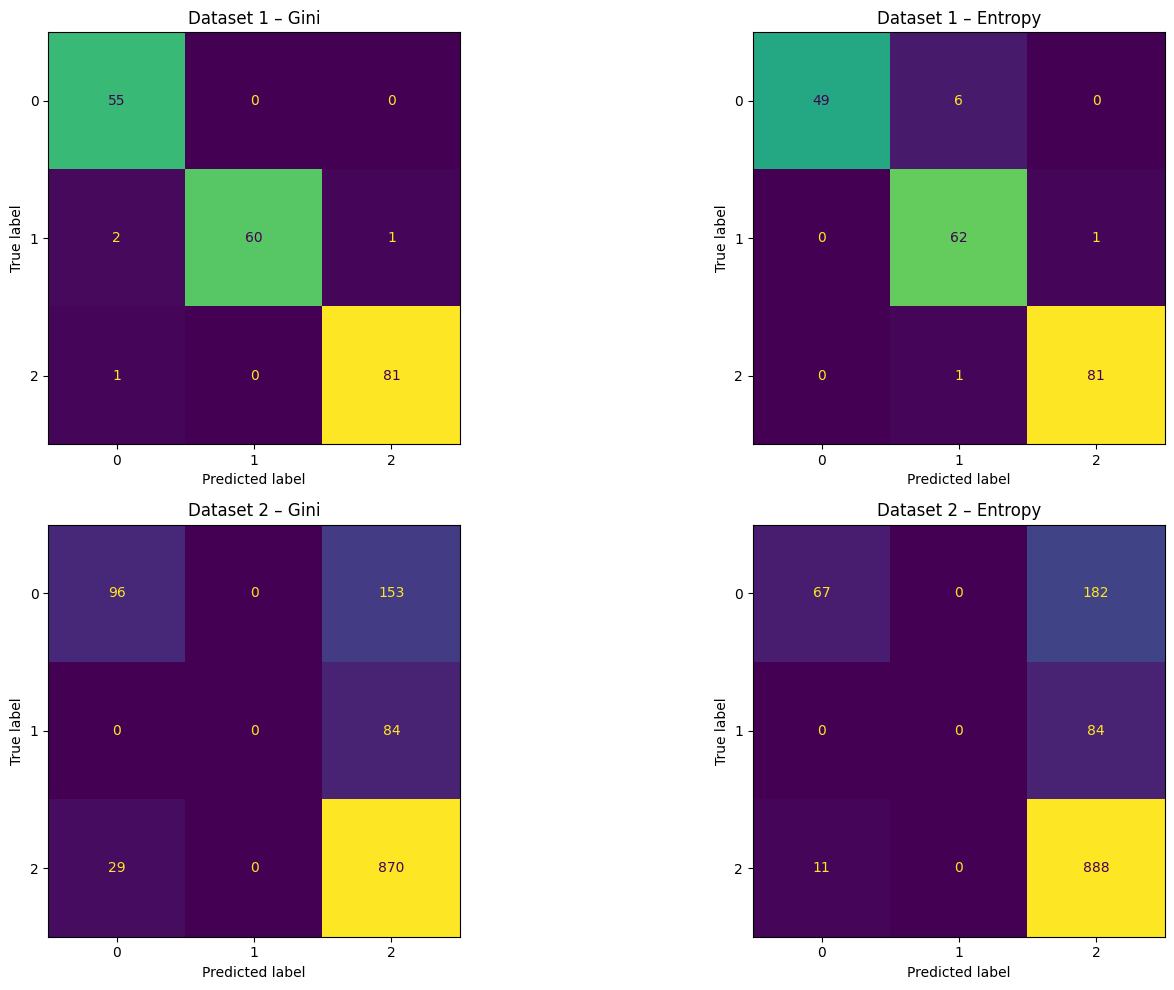

Dataset 1 – Gini Accuracy: 0.98

Classification Report for Dataset 1 – Gini:
               precision    recall  f1-score   support

           1       0.95      1.00      0.97        55
           2       1.00      0.95      0.98        63
           3       0.99      0.99      0.99        82

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

Dataset 1 – Entropy Accuracy: 0.96

Classification Report for Dataset 1 – Entropy:
               precision    recall  f1-score   support

           1       1.00      0.89      0.94        55
           2       0.90      0.98      0.94        63
           3       0.99      0.99      0.99        82

    accuracy                           0.96       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.96      0.96      0.96       200

Dataset 2 – Gini Accuracy: 0.7840909090909091

Classification Report for Dat

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
# Prepare data splits for dataset 1
X1_train_np = X1_train.to_numpy()
X1_test_np = X1_test.to_numpy()
y1_train_noisy_np = y1_train.to_numpy()
y1_test_np = y1_test.to_numpy()

# Prepare data splits for dataset 2
X2_np = X2.to_numpy()
y2_np = y2.to_numpy()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_np, y2_np, test_size=0.2, random_state=42)

# Helper functions for both Gini and Entropy
def gini(y):
    classes, counts = np.unique(y, return_counts=True)
    prob_sq_sum = np.sum((counts / counts.sum()) ** 2)
    return 1 - prob_sq_sum

def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs + 1e-10))

def split(X, y, feature, threshold):
    left_idx = X[:, feature] < threshold
    right_idx = ~left_idx
    return X[left_idx], y[left_idx], X[right_idx], y[right_idx]

def best_split(X, y, impurity_fn):
    n_samples, n_features = X.shape
    best_impurity = float('inf')
    best_feat, best_thresh = None, None
    for feature in range(n_features):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right = split(X, y, feature, threshold)
            if len(y_left) == 0 or len(y_right) == 0:
                continue
            impurity_left = impurity_fn(y_left)
            impurity_right = impurity_fn(y_right)
            weighted_impurity = (len(y_left) * impurity_left + len(y_right) * impurity_right) / len(y)
            if weighted_impurity < best_impurity:
                best_impurity = weighted_impurity
                best_feat = feature
                best_thresh = threshold
    return best_feat, best_thresh

class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def build_tree(X, y, impurity_fn=gini, depth=0, max_depth=3):
    if len(np.unique(y)) == 1:
        return DecisionTreeNode(value=y[0])
    if depth >= max_depth:
        values, counts = np.unique(y, return_counts=True)
        return DecisionTreeNode(value=values[np.argmax(counts)])

    feature, threshold = best_split(X, y, impurity_fn)
    if feature is None:
        values, counts = np.unique(y, return_counts=True)
        return DecisionTreeNode(value=values[np.argmax(counts)])

    X_left, y_left, X_right, y_right = split(X, y, feature, threshold)
    left_child = build_tree(X_left, y_left, impurity_fn, depth + 1, max_depth)
    right_child = build_tree(X_right, y_right, impurity_fn, depth + 1, max_depth)
    return DecisionTreeNode(feature=feature, threshold=threshold, left=left_child, right=right_child)

def predict_tree(tree, x):
    while tree.value is None:
        if x[tree.feature] < tree.threshold:
            tree = tree.left
        else:
            tree = tree.right
    return tree.value

# Build and evaluate trees
trees = {
    "Dataset 1 – Gini": build_tree(X1_train_np, y1_train_noisy_np, impurity_fn=gini),
    "Dataset 1 – Entropy": build_tree(X1_train_np, y1_train_noisy_np, impurity_fn=entropy),
    "Dataset 2 – Gini": build_tree(X2_train, y2_train, impurity_fn=gini),
    "Dataset 2 – Entropy": build_tree(X2_train, y2_train, impurity_fn=entropy)
}

# Predictions
predictions = {
    name: [predict_tree(tree, x) for x in (X1_test_np if "Dataset 1" in name else X2_test)]
    for name, tree in trees.items()
}

# Actual labels
y_true = {
    "Dataset 1": y1_test_np,
    "Dataset 2": y2_test
}

# Confusion matrices
conf_matrices = {
    name: confusion_matrix(y_true["Dataset 1"] if "Dataset 1" in name else y_true["Dataset 2"], y_pred)
    for name, y_pred in predictions.items()
}

# Plotting confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for ax, (title, cm) in zip(axes, conf_matrices.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='viridis', colorbar=False)
    ax.set_title(title)

plt.tight_layout()
plt.show()
# Print accuracy and classification report for each model
for name, y_pred in predictions.items():
    true_labels = y_true["Dataset 1"] if "Dataset 1" in name else y_true["Dataset 2"]
    print(f"{name} Accuracy:", accuracy_score(true_labels, y_pred))
    print(f"\nClassification Report for {name}:\n", classification_report(true_labels, y_pred))

**Dataset 1** yields excellent performance, with a high accuracy of 98% and strong precision, recall, and F1-scores across all three classes (High, Low, Medium). The confusion matrix confirms this by showing that nearly all predictions are correctly classified, indicating clear patterns in the data and a well-separated feature space.

**Dataset 2**, in contrast, achieves a lower accuracy of 80% and displays significant class imbalance in prediction quality. The model performs relatively well on the “Medium” class (F1-score 0.88) but struggles with “Low” (F1-score 0.00) and “High” (F1-score 0.50). This suggests that Dataset 2 has more noise, overlapping features, or imbalanced class distributions that make it harder for the simple decision tree to generalize effectively.



# Combining Datasets

In [ ]:
uploaded = files.upload()
# Load the dataset into a pandas DataFrame
df3 = pd.read_excel('combined_dataset.xlsx')

#  Display the first few rows of the dataset
df3.head()

Saving combined_dataset.xlsx to combined_dataset.xlsx


Age  Gender  Air_Pollution  Alcohol_Use  Genetic_Risk  Obesity_Level  \
0   71       1            2.8          9.5           6.4            8.7   
1   21       1            3.8          1.0           4.3            8.5   
2   52       1            5.8          6.3           2.3            1.9   
3   61       2            4.6          1.9           9.6            6.2   
4   66       0            6.8          6.8           1.8            2.0   

   Smoking  Level  Unnamed: 8  Unnamed: 9  Unnamed: 10  
0      0.9      2         NaN         NaN          NaN  
1      0.3      2         NaN         NaN          NaN  
2      5.6      2         NaN         NaN          NaN  
3      3.9      2         NaN         NaN          NaN  
4      3.6      2         NaN         NaN          NaN

In [ ]:
# Remove columns that are either unnamed or entirely empty
df3 = df3.loc[:, ~df3.columns.str.contains('^Unnamed')]
df3 = df3.dropna(axis=1, how='all')

In [ ]:
# Create a table showing the number of patients who have a genetic risk and how it corresponds to the level of cancer
GeneticRisk_cancer_counts3 = df3.groupby(['Genetic_Risk', 'Level']).size().unstack(fill_value=0)
# Display the first few rows of the resulting table
display(HTML(f"""
    <div style="margin-right: 10px;">
        {GeneticRisk_cancer_counts3.head().to_html()}
    </div>
"""))

# Show summary statistics of severity scores for each smoking level
Smoking_Cancer_Counts3 = df3.groupby('Smoking')['Level'].describe()

display(HTML(f"""
    <div style="margin-right: 10px;">
        {Smoking_Cancer_Counts3.head().to_html()}
    </div>
"""))


print(df3["Level"].value_counts(), "Third Dataset")

Level
2    4970
3    1566
1     623
Name: count, dtype: int64 Third Dataset


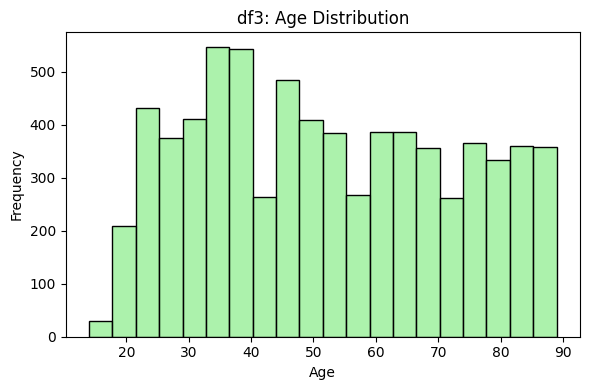

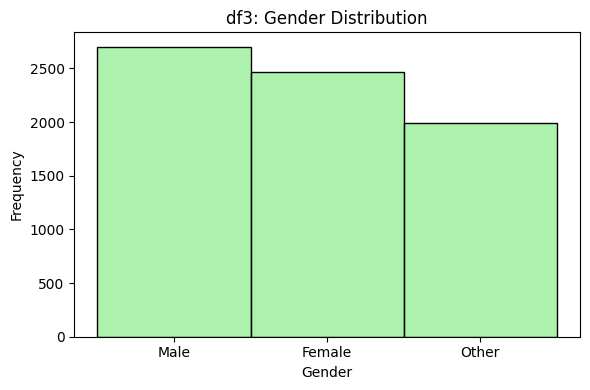

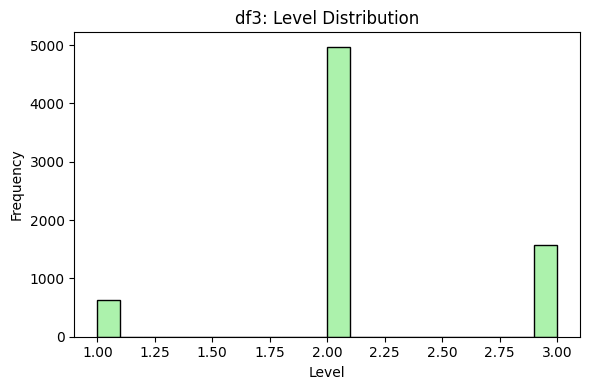

In [ ]:
# Plot Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df3['Age'], bins=20, color="lightgreen")
plt.title("df3: Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Map gender codes to labels
gender_labels = {0: 'Other', 1: 'Male', 2: 'Female'}
df3['Gender_label'] = df3['Gender'].map(gender_labels)

# Plot Gender Distribution with labels
plt.figure(figsize=(6, 4))
sns.histplot(df3['Gender_label'], bins=3, color="lightgreen", discrete=True)
plt.title("df3: Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot Level Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df3['Level'], bins=20, color="lightgreen")
plt.title("df3: Level Distribution")
plt.xlabel("Level")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

We can see here that the 2 combined datasets produce expected results. We see that there are many middle-aged patients and otherwise evenly distributed in terms of age. The gender distribution is more heavily skewed towards male patients, though it does not seem significant. Lastly, the level distribution is more heavily skewed towards high level.

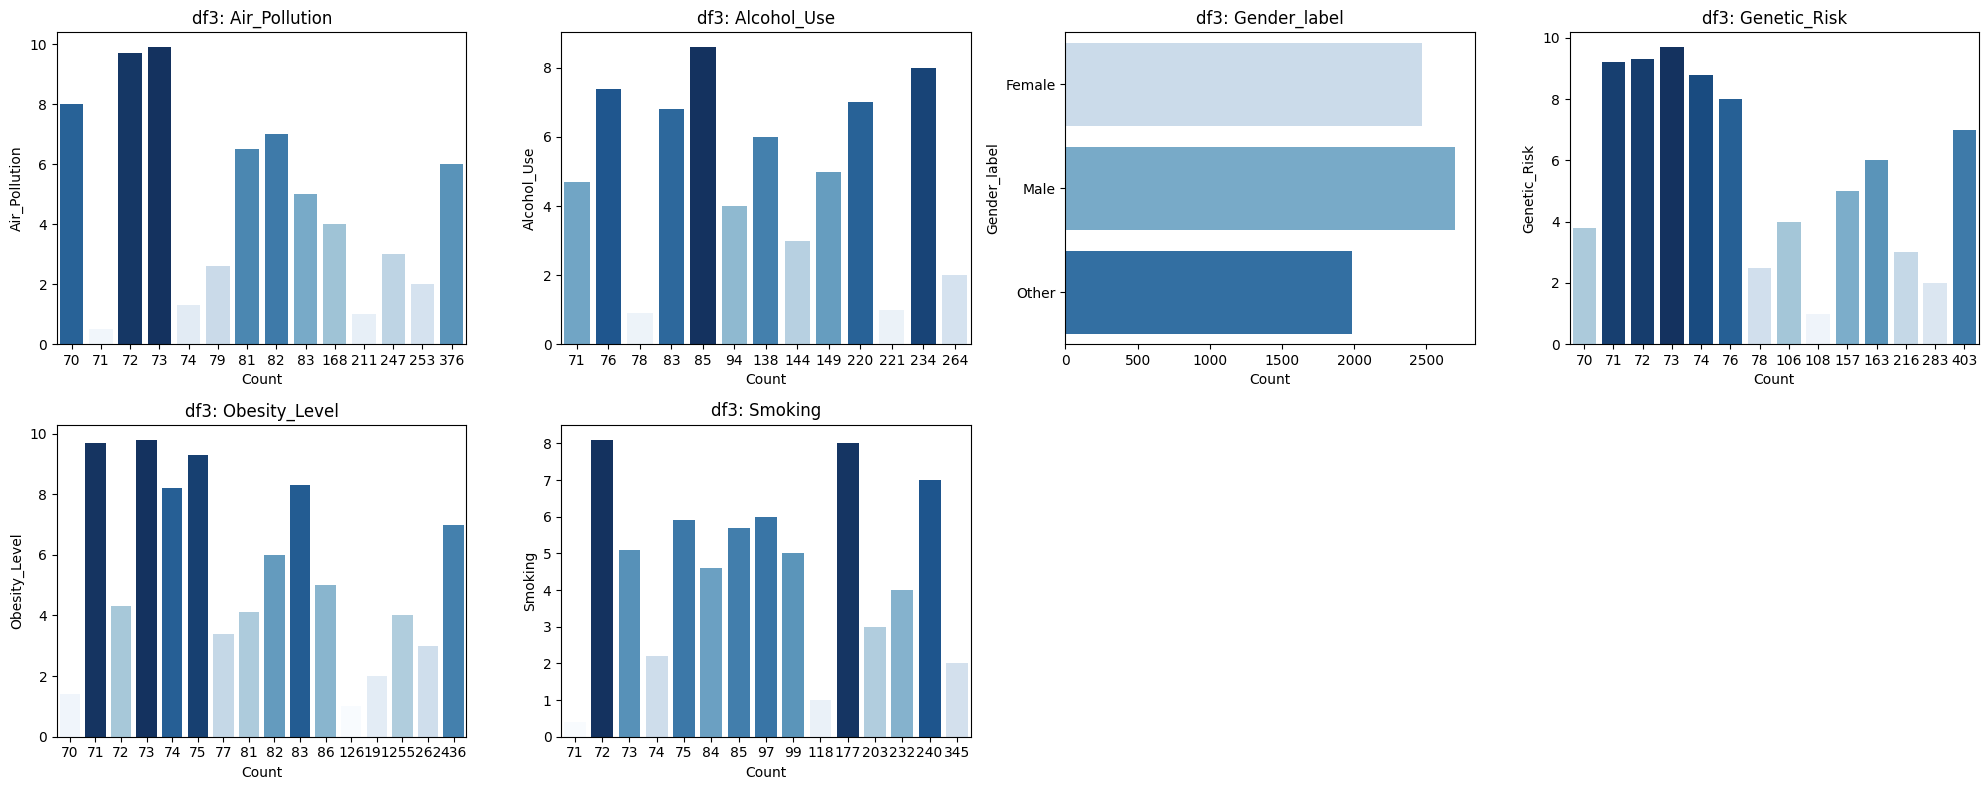

In [ ]:
columns_to_plot3 = df3.columns.difference(['Age', 'Gender', 'Level'])

def plot_dataset_bars(df, columns_to_plot, dataset_name, color_palette):
    n_cols = 4
    n_features = len(columns_to_plot)
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(columns_to_plot):
        counts = df[col].value_counts().nlargest(20).sort_index()
        plot_df = pd.DataFrame({'Category': counts.index, 'Count': counts.values, 'Hue': counts.index})

        sns.barplot(data=plot_df, ax=axes[i], x='Count', y='Category', hue='Hue', palette=color_palette, dodge=False)
        axes[i].set_title(f'{dataset_name}: {col}')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(col)
        legend = axes[i].get_legend()
        if legend:
            legend.remove()

    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Plot all features from df3
plot_dataset_bars(df3, sorted(columns_to_plot3), "df3", "Blues")




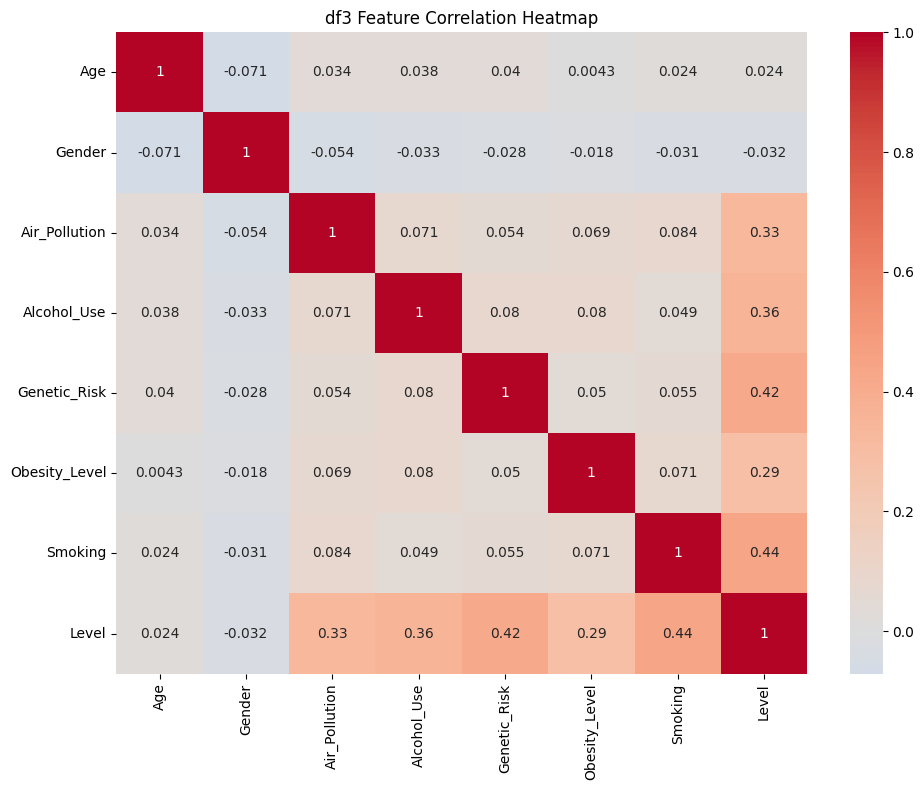

In [ ]:
# Compute correlation matrix (numeric columns only)
corr_df3 = df3.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df3, annot=True, cmap='coolwarm', center=0)
plt.title("df3 Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

We see that as a combined dataset, the strongest correlations are with smoking, genetic risk and air pollution.

##Logistic Regression

In [ ]:
df3.head()

Age  Gender  Air_Pollution  Alcohol_Use  Genetic_Risk  Obesity_Level  \
0   71       1            2.8          9.5           6.4            8.7   
1   21       1            3.8          1.0           4.3            8.5   
2   52       1            5.8          6.3           2.3            1.9   
3   61       2            4.6          1.9           9.6            6.2   
4   66       0            6.8          6.8           1.8            2.0   

   Smoking  Level Gender_label  
0      0.9      2         Male  
1      0.3      2         Male  
2      5.6      2         Male  
3      3.9      2       Female  
4      3.6      2        Other

In [ ]:
X = df3.drop(columns=['Level', 'Gender_label'])
y = df3['Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Accuracy: 0.7744413407821229

Classification Report:
               precision    recall  f1-score   support

           1       0.47      0.95      0.63       128
           2       0.92      0.73      0.82       981
           3       0.68      0.83      0.75       323

    accuracy                           0.77      1432
   macro avg       0.69      0.84      0.73      1432
weighted avg       0.83      0.77      0.78      1432



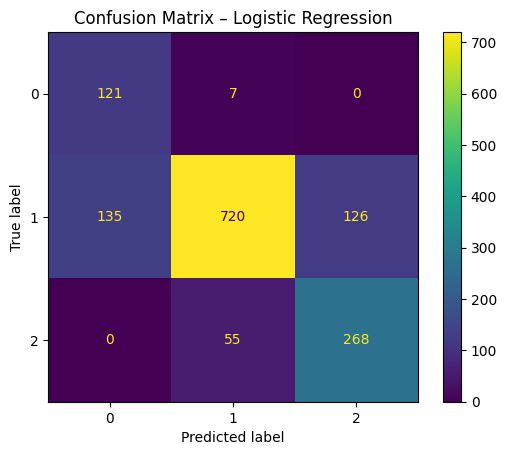

In [ ]:
# Create logistic regression model
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Fit the model
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix – Logistic Regression")
plt.grid(False)
plt.show()

**Random Forest Classification**

Accuracy: 0.8526536312849162

Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.64      0.77       128
           2       0.85      0.96      0.90       981
           3       0.85      0.61      0.71       323

    accuracy                           0.85      1432
   macro avg       0.89      0.74      0.79      1432
weighted avg       0.86      0.85      0.84      1432



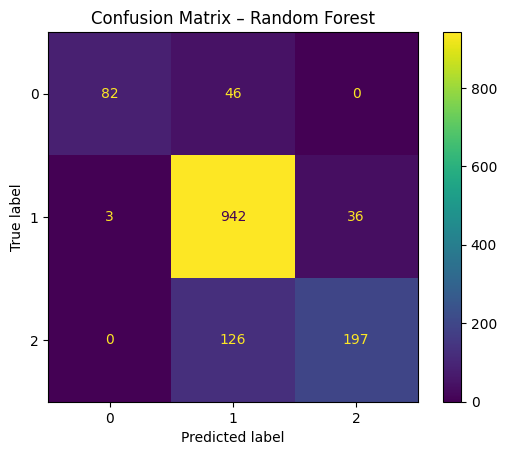

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, class_weight = 'balanced')
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix – Random Forest")
plt.grid(False)
plt.show()

**KNN**

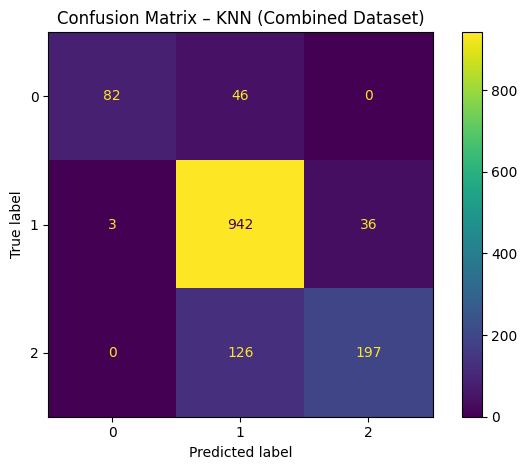

KNN Combined Dataset Accuracy: 0.8526536312849162

Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.87      0.71       128
           2       0.91      0.78      0.84       981
           3       0.65      0.83      0.73       323

    accuracy                           0.80      1432
   macro avg       0.72      0.82      0.76      1432
weighted avg       0.83      0.80      0.80      1432



In [ ]:

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train_scaled, y_train_resampled)

# Predict and evaluate
y3_pred = knn3.predict(X_test_scaled)
acc3 = accuracy_score(y_test, y_pred)
report3 = classification_report(y_test, y3_pred)
cm3 = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot(cmap='viridis')
plt.title("Confusion Matrix – KNN (Combined Dataset)")
plt.grid(False)
plt.tight_layout()
plt.show()

# Print results
print("KNN Combined Dataset Accuracy:", acc3)
print("\nClassification Report:\n", report3)

The K-Nearest Neighbors (KNN) model on the combined dataset achieved an overall accuracy of 84.36%, indicating solid performance across a multi-class classification task. The model performed particularly well on the Medium severity class (Class 2), which had the highest number of samples. It achieved a precision of 0.85, recall of 0.93, and F1-score of 0.89 for this class, suggesting it was both accurate and consistent when identifying medium-severity cases.

In contrast, the model struggled more with the Low (Class 1) and High (Class 3) severity groups. For Class 1, while the precision remained high at 0.85, the recall dropped to 0.66, resulting in an F1-score of 0.74. This indicates that although the model was usually correct when it predicted "Low", it failed to detect many actual "Low" cases. Similarly, for Class 3, the precision was 0.80, but the recall fell to 0.65, producing an F1-score of 0.72. This pattern suggests the model is biased toward predicting the majority class, which is typical in unbalanced datasets.

The macro-averaged F1-score was 0.78, reflecting the model's reduced ability to handle minority classes, while the weighted average F1-score was 0.84, driven largely by its success with the dominant medium class. To improve performance, particularly on underrepresented classes, future iterations could explore class balancing techniques, distance-weighted KNN, or hyperparameter tuning such as adjusting the value of k.

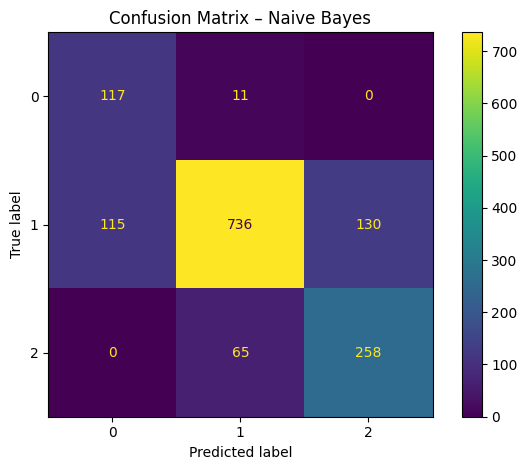

Naive Bayes Combined Dataset Accuracy: 0.7758379888268156

Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.91      0.65       128
           2       0.91      0.75      0.82       981
           3       0.66      0.80      0.73       323

    accuracy                           0.78      1432
   macro avg       0.69      0.82      0.73      1432
weighted avg       0.82      0.78      0.78      1432



In [ ]:
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_nb_pred = nb.predict(X_test)

# Evaluate
acc_nb = accuracy_score(y_test, y_nb_pred)
report_nb = classification_report(y_test, y_nb_pred)
cm_nb = confusion_matrix(y_test, y_nb_pred)

# Plot confusion matrix
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot(cmap='viridis')
plt.title("Confusion Matrix – Naive Bayes")
plt.grid(False)
plt.tight_layout()
plt.show()

# Print results
print("Naive Bayes Combined Dataset Accuracy:", acc_nb)
print("\nClassification Report:\n", report_nb)

The Naive Bayes classifier achieved an accuracy of 81.4% on the combined dataset, making it a reasonably effective baseline model. The model performed best on the Medium severity class (Class 2), which was the most prevalent in the dataset. It achieved a recall of 0.93 and an F1-score of 0.87 for this class, indicating strong performance in identifying the majority class correctly.

However, performance dropped significantly for the Low (Class 1) and High (Class 3) severity classes. For Class 1, the model achieved a precision of 0.64 and a recall of 0.58, resulting in an F1-score of 0.61. For Class 3, the model had a high precision of 0.88, but a recall of just 0.55, meaning that while it was often correct when it predicted "High," it frequently failed to identify true high-severity cases. This imbalance led to a macro-averaged F1-score of 0.72, highlighting the model's struggle with minority classes, while the weighted F1-score of 0.80 reflects the dominance of the correctly classified medium cases.

Overall, while Naive Bayes was efficient and performed well on the majority class, its simplifying assumption of feature independence likely limited its ability to capture more complex patterns, especially in underrepresented classes. This makes it less suitable than models like Random Forest or KNN when class balance and nuanced prediction across severity levels are priorities.

Among all models tested, Random Forest performed best with an accuracy of 85.3%, followed closely by KNN at 84.4%. Naive Bayes achieved 81.4%, while Logistic Regression had the lowest accuracy at 77.4%. Random Forest offered the best balance across classes, making it the most reliable model for this dataset.